### Objective


#### The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

### Data Set Description

#### The file solarpowergeneration.csv contains the data for this example. Here, the number of variables (columns) is 10, and the number of instances (rows) is 2920. We have the following variables for this analysis:

#### •	distance_to_solar_noon, in radians.

#### •	temperature, daily average temperature, in degrees Celsius.

#### •	wind_direction, daily average wind direction, in degrees (0-360).

#### •	wind_speed, daily average wind speed, in meters per second

#### •	sky_cover, on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.

#### •	visibility, in kilometers.

#### •	humidity, in percentage.

#### •	average_wind_speed, average wind speed during the 3 hours de measure was taken in meters per second.

#### •	average_pressure, average barometric pressure during the 3 hours the measure was taken in, in mercury inches.

#### •	power_generated(Target), in Jules for each 3 hours

In [ ]:
# Importing the required libraries
# Pandas is used for data manipulation and analysis, providing data structures like DataFrame.
import pandas as pd

# Numpy is used for numerical computations, including working with arrays and performing mathematical operations.
import numpy as np

# Matplotlib is a plotting library used for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# Seaborn is a statistical data visualization library based on Matplotlib, making complex visualizations easy to create.
import seaborn as sns

# Ignoring warnings to avoid cluttering the output with unnecessary warnings during code execution.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the CSV file named "solarpowergeneration.csv" into a Pandas DataFrame.
# The `na_values` parameter is used to specify additional symbols (like '!', '@', etc.) that should be treated as missing values (NaN).
power = pd.read_csv("solarpowergeneration.csv", na_values=["!", "@", "#", "$", "%", "^", "&", "*"])

# Displaying the first few rows of the DataFrame to ensure the data has been loaded correctly.
power

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [ ]:
# Rename columns in the dataset to valid Python variable names
power = power.rename(columns={
    'power-generated': 'power_generated',
    'sky-cover': 'sky_cover',
    'distance-to-solar-noon': 'distance_to_solar_noon',
    'wind-direction': 'wind_direction',
    'wind-speed': 'wind_speed',
    'average-wind-speed-(period)': 'average_wind_speed_period',
    'average-pressure-(period)': 'average_pressure_period'
})

In [ ]:
power.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period', 'power_generated'],
      dtype='object')

In [ ]:
# Displaying the data types of each column in the DataFrame.
# This helps to understand the structure of the dataset, such as which columns are numeric, categorical, or have other data types.
power.dtypes

,0
distance_to_solar_noon,float64
temperature,int64
wind_direction,int64
wind_speed,float64
sky_cover,int64
visibility,float64
humidity,int64
average_wind_speed_period,float64
average_pressure_period,float64
power_generated,int64


In [ ]:
# Converting the data type of the "sky-cover" column to "category".
# This is useful for optimizing memory and signaling that the column contains categorical data rather than numerical values.
power = power.astype({"sky_cover": "category"})

# Displaying the updated data types of each column to confirm that the conversion was successful.
power.dtypes

,0
distance_to_solar_noon,float64
temperature,int64
wind_direction,int64
wind_speed,float64
sky_cover,category
visibility,float64
humidity,int64
average_wind_speed_period,float64
average_pressure_period,float64
power_generated,int64


In [ ]:
# Checking and displaying the data types of each column in the DataFrame.
# This helps verify the structure of the dataset and ensures that the columns have the correct data types after any modifications.
power.dtypes

,0
distance_to_solar_noon,float64
temperature,int64
wind_direction,int64
wind_speed,float64
sky_cover,category
visibility,float64
humidity,int64
average_wind_speed_period,float64
average_pressure_period,float64
power_generated,int64


In [ ]:
# Checking for missing values in each column of the DataFrame.
# The isnull() function identifies missing (NaN) values, and sum() calculates the total count of missing values for each column.
power.isnull().sum()

,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
sky_cover,0
visibility,0
humidity,0
average_wind_speed_period,1
average_pressure_period,0
power_generated,0


In [ ]:
# Checking for duplicate rows in the DataFrame.
# The duplicated() function identifies duplicate rows, and sum() counts the total number of duplicate rows.
power.duplicated().sum()

0

In [ ]:
# Generating summary statistics for numerical columns in the DataFrame.
# The describe() function provides statistics like count, mean, standard deviation, min, max, and quartiles for each numerical column.
power.describe()

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,10.000000,100.000000,40.000000,30.530000,36580.000000


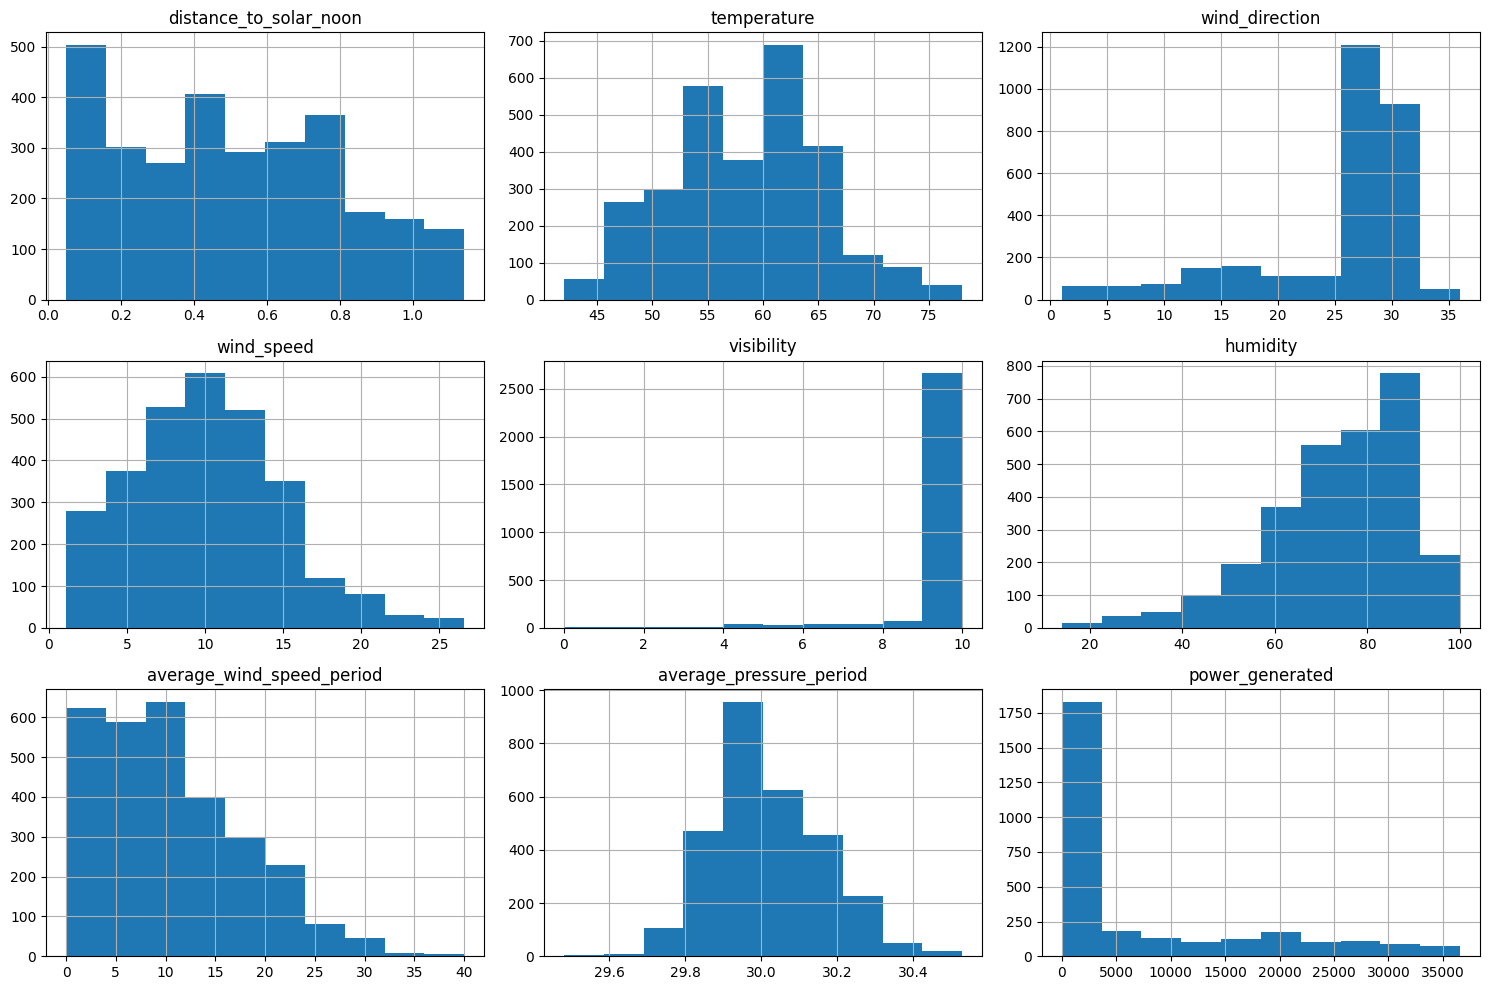

In [ ]:
# Plotting histograms for each numerical column in the DataFrame.
# The hist() function creates a histogram for every numeric column, and figsize sets the size of the plot.
power.hist(figsize=(15, 10))

# Adjusting the layout of the plot to prevent overlap and ensure a clean display.
# The tight_layout() function automatically adjusts the spacing between subplots for a more readable output.
plt.tight_layout()

# Displaying the plot on the screen.
plt.show()

In [ ]:
# Calculating the correlation matrix for the numerical columns in the DataFrame.
# The corr() function computes pairwise correlation coefficients between the numerical columns,
# showing the relationship between each pair of columns (e.g., Pearson correlation).
power.corr()

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
distance_to_solar_noon,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214891,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054546,-0.435723,0.132193
wind_direction,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229844,-0.272405,0.146788
wind_speed,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.673626,-0.379752,0.142641
sky_cover,-0.015184,-0.230672,-0.137140,0.107793,1.000000,-0.223523,0.394576,0.044301,-0.091512,-0.187236
visibility,0.065807,0.194110,0.203445,0.184778,-0.223523,1.000000,-0.291320,0.143621,-0.105345,0.076536
humidity,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,1.000000,-0.218042,0.018489,-0.522545
average_wind_speed_period,-0.214891,0.054546,0.229844,0.673626,0.044301,0.143621,-0.218042,1.000000,-0.293457,0.278174
average_pressure_period,0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293457,1.000000,-0.036771
power_generated,-0.746681,0.132193,0.146788,0.142641,-0.187236,0.076536,-0.522545,0.278174,-0.036771,1.000000


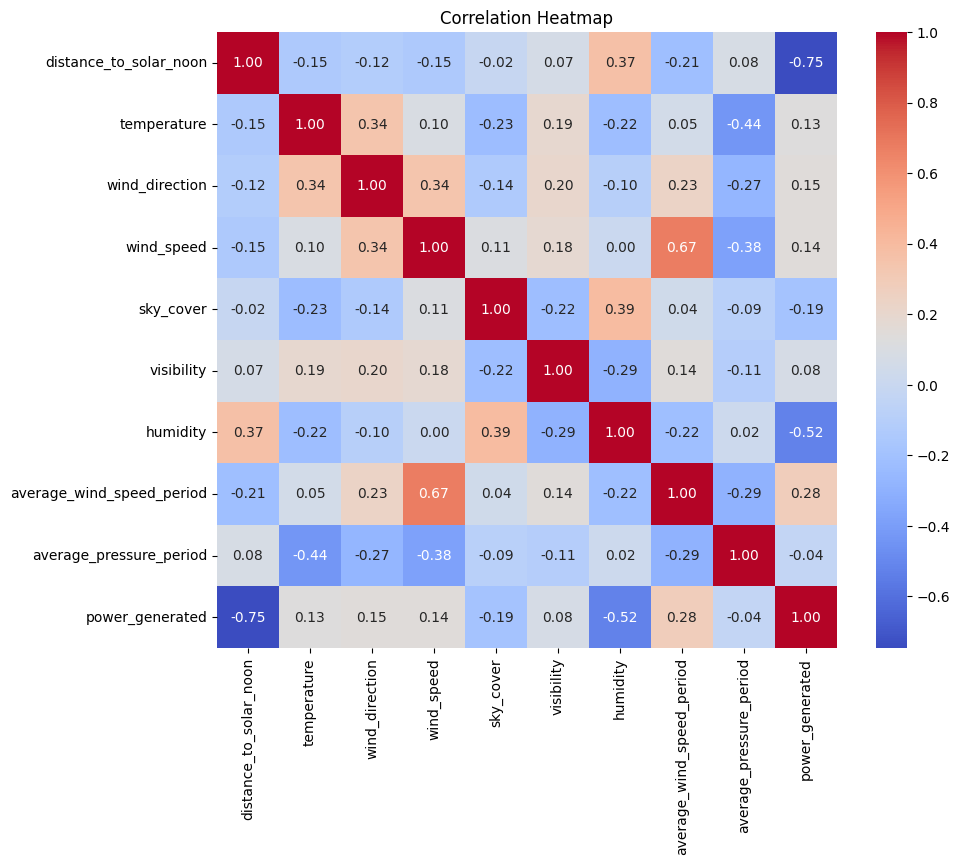

In [ ]:
# Calculate the correlation matrix for the numerical columns in the DataFrame.
# The corr() function computes the pairwise correlation coefficients between numerical columns.
correlation_matrix = power.corr()

# Create a correlation heatmap to visualize the correlation matrix.
# The figsize argument adjusts the size of the plot, and sns.heatmap is used to generate the heatmap.
plt.figure(figsize=(10, 8))

# Plotting the heatmap with annotations, formatting correlation values to two decimal places, and using a color map ("coolwarm").
# The cbar argument adds a color bar to the side of the heatmap.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Adding a title to the heatmap for better understanding.
plt.title("Correlation Heatmap")

# Displaying the heatmap.
plt.show()

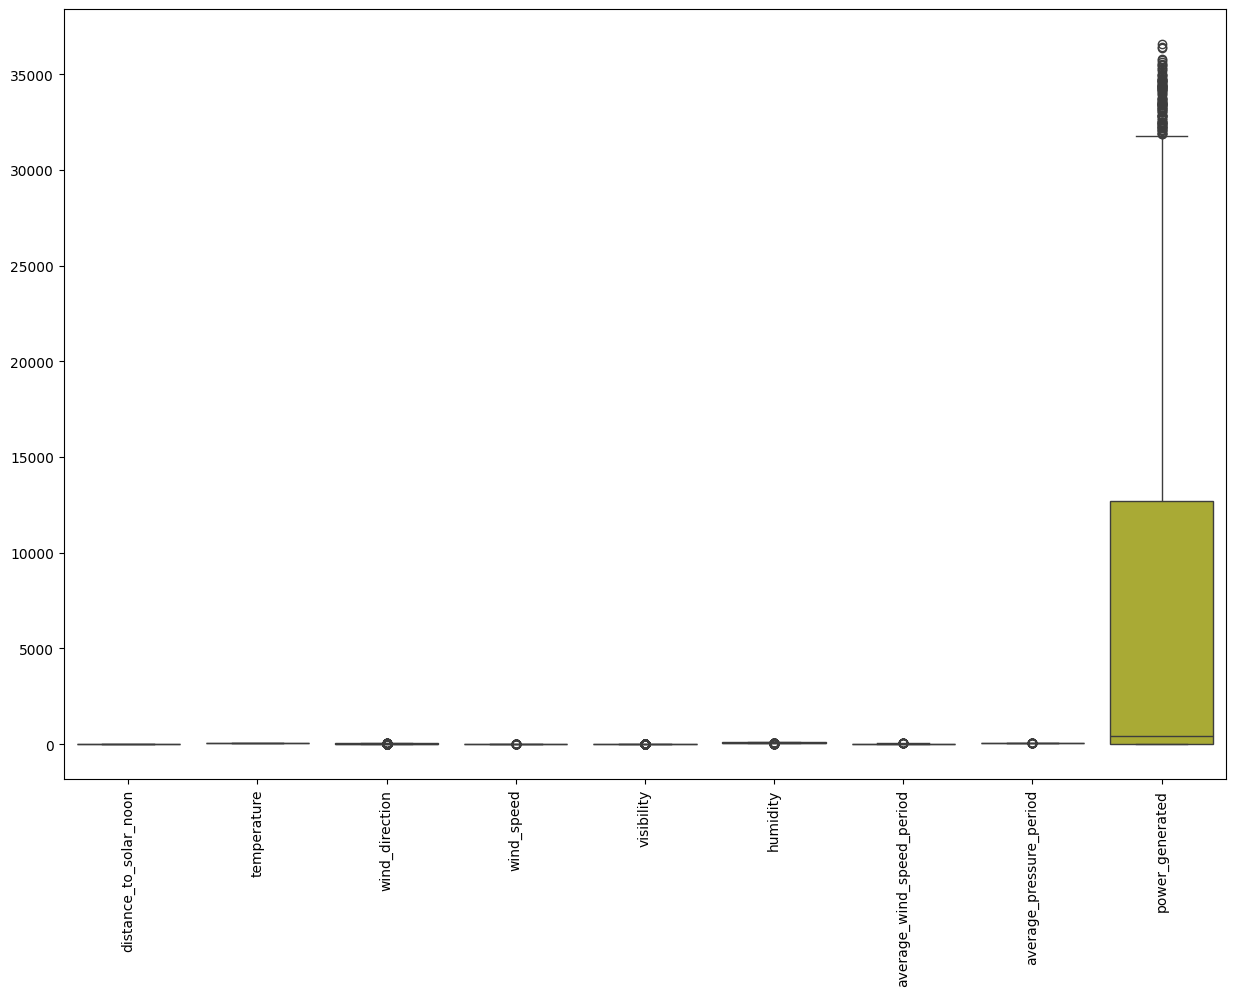

In [ ]:
# Creating a boxplot to visualize the distribution and detect outliers for each numerical column in the DataFrame.
# The figsize argument sets the size of the plot, and sns.boxplot generates the boxplot.
plt.figure(figsize=(15, 10))

# Creating a boxplot for all the numerical columns in the "power" DataFrame.
sns.boxplot(data=power)

# Rotating the x-axis labels by 90 degrees to prevent overlapping text and improve readability.
plt.xticks(rotation=90)

# Displaying the boxplot on the screen.
plt.show()

In [ ]:
# Step 1: Select numerical columns from the DataFrame (columns with float64 or int64 data types).
# The select_dtypes method is used to filter numerical columns from the DataFrame.
numerical_columns = power.select_dtypes(include=["float64", "int64"]).columns

# Initialize an empty dictionary to store the count of outliers for each numerical column.
outliers_dict = {}

# Step 2: Loop through each numerical column to calculate outliers.
for col in numerical_columns:
    # Calculate the first quartile (Q1), which is the 25th percentile of the column.
    Q1 = np.percentile(power[col], 25)

    # Calculate the third quartile (Q3), which is the 75th percentile of the column.
    Q3 = np.percentile(power[col], 75)

    # Step 3: Compute the Interquartile Range (IQR) as the difference between Q3 and Q1.
    IQR = Q3 - Q1

    # Step 4: Determine the lower and upper bounds for identifying outliers.
    # Values outside the range of [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 5: Identify the outliers by filtering rows that fall outside the defined bounds.
    outliers = power[(power[col] < lower_bound) | (power[col] > upper_bound)]

    # Step 6: Count the number of outliers in the column.
    outliers_count = len(outliers)

    # Store the count of outliers for the column in the outliers_dict dictionary.
    outliers_dict[col] = outliers_count

    # Print the results for each column, including Q1, Q3, IQR, bounds, and the number of outliers.
    print(f"Column: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers Count: {outliers_count}")
    print("-" * 50)

# Calculate the total number of outliers across all numerical columns by summing the outliers counts.
total_outliers = sum(outliers_dict.values())

# Print the total number of outliers across all columns.
print(f"Total Outliers across all columns: {total_outliers}")

Column: distance_to_solar_noon
Q1: 0.24371397625
Q3: 0.739527509
IQR: 0.49581353274999995
Lower Bound: -0.5000063228749999
Upper Bound: 1.4832478081249998
Outliers Count: 0
--------------------------------------------------
Column: temperature
Q1: 53.0
Q3: 63.0
IQR: 10.0
Lower Bound: 38.0
Upper Bound: 78.0
Outliers Count: 0
--------------------------------------------------
Column: wind_direction
Q1: 25.0
Q3: 29.0
IQR: 4.0
Lower Bound: 19.0
Upper Bound: 35.0
Outliers Count: 528
--------------------------------------------------
Column: wind_speed
Q1: 6.6
Q3: 13.1
IQR: 6.5
Lower Bound: -3.1500000000000004
Upper Bound: 22.85
Outliers Count: 40
--------------------------------------------------
Column: visibility
Q1: 10.0
Q3: 10.0
IQR: 0.0
Lower Bound: 10.0
Upper Bound: 10.0
Outliers Count: 429
--------------------------------------------------
Column: humidity
Q1: 65.0
Q3: 84.0
IQR: 19.0
Lower Bound: 36.5
Upper Bound: 112.5
Outliers Count: 83
---------------------------------------------

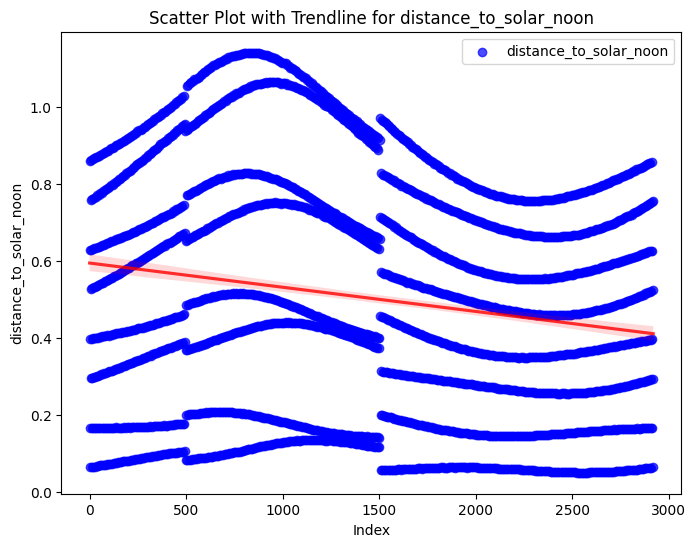

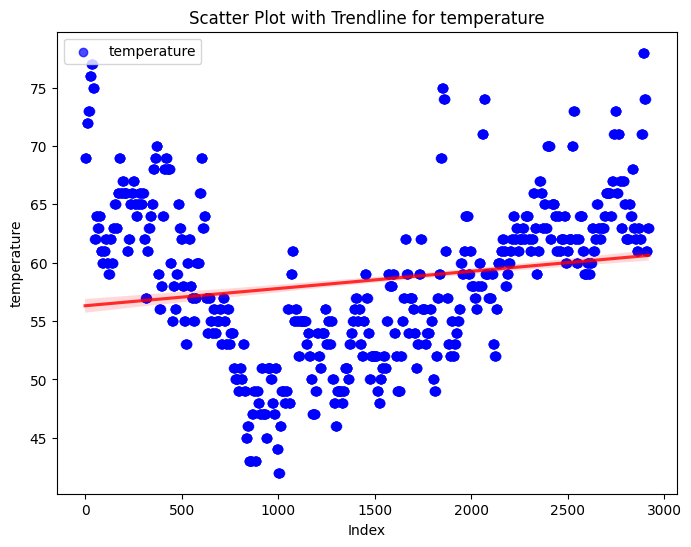

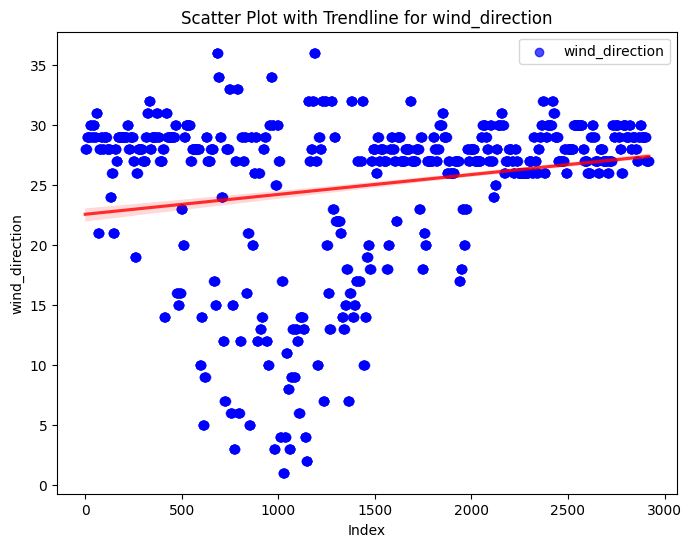

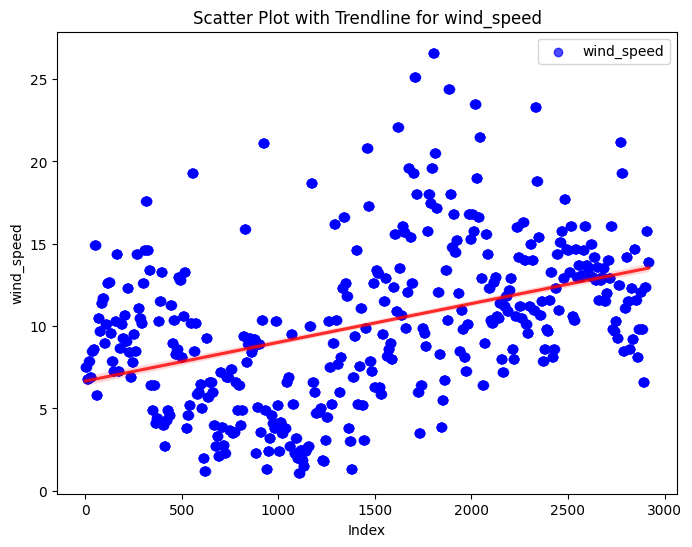

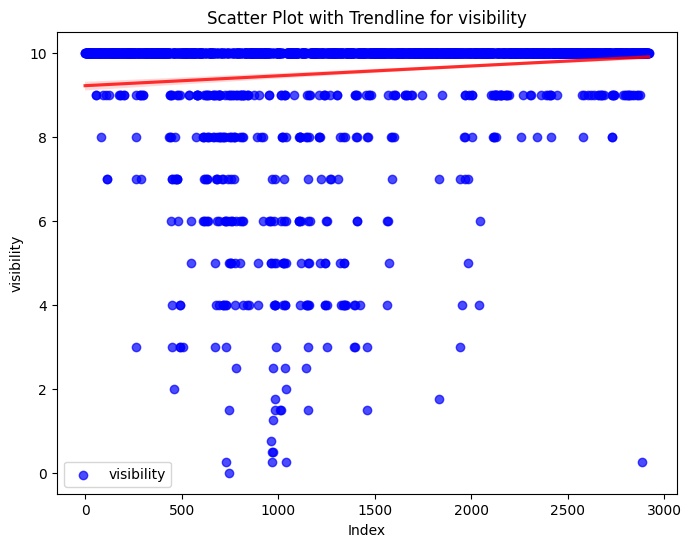

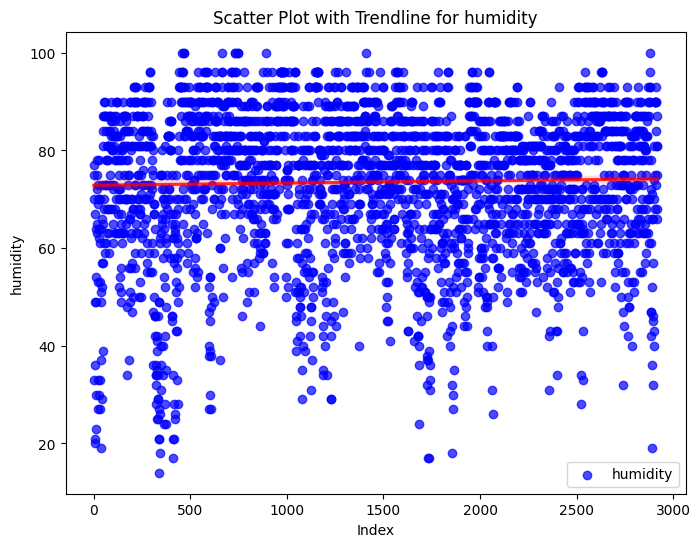

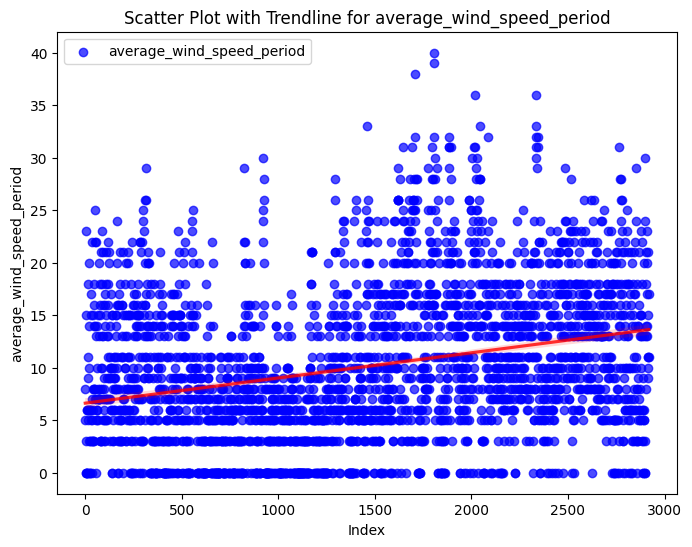

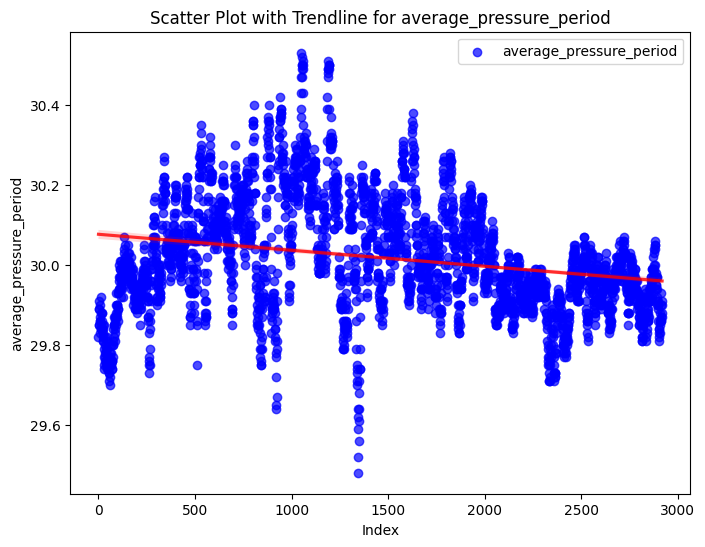

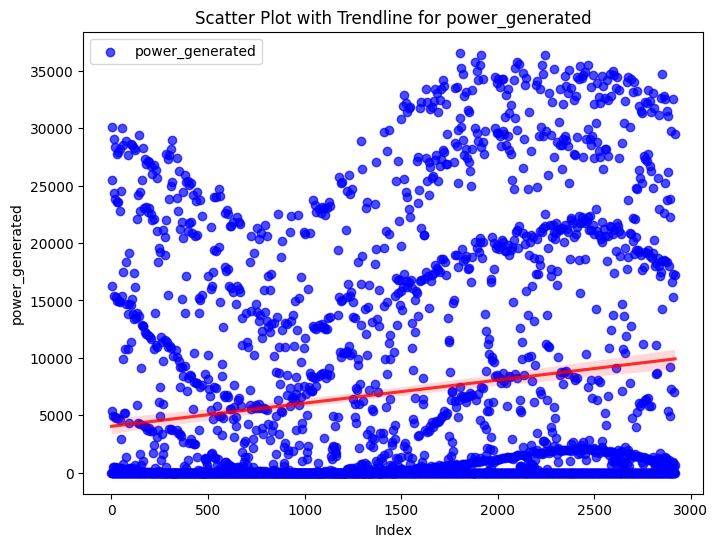

In [ ]:
# Step 1: Select numerical columns from the DataFrame (columns with float64 or int64 data types).
# The select_dtypes method filters out the numerical columns from the DataFrame for further analysis.
numerical_columns = power.select_dtypes(include=["float64", "int64"]).columns

# Step 2: Loop through each numerical column to generate scatter plots with trendlines.
for col in numerical_columns:
    # Step 3: Plot the scatter plot with a trendline for each numerical column.
    # Create a new figure with specified size for each plot.
    plt.figure(figsize=(8, 6))

    # Use sns.regplot() to create a scatter plot along with a regression line (trendline).
    # The scatter plot will display points with transparency (alpha=0.7), and the trendline is drawn in red with specified transparency.
    sns.regplot(x=power.index, y=power[col], label=col, color='blue', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red', 'alpha': 0.8})

    # Add plot title that includes the column name, making it easier to identify the plot.
    plt.title(f"Scatter Plot with Trendline for {col}")

    # Label the x-axis as 'Index' since the index values are being used on the x-axis.
    plt.xlabel('Index')

    # Label the y-axis with the name of the current column, which represents the data being plotted.
    plt.ylabel(col)

    # Add a legend to the plot to identify the scatter plot with the column name.
    plt.legend()

    # Show the plot on the screen.
    plt.show()

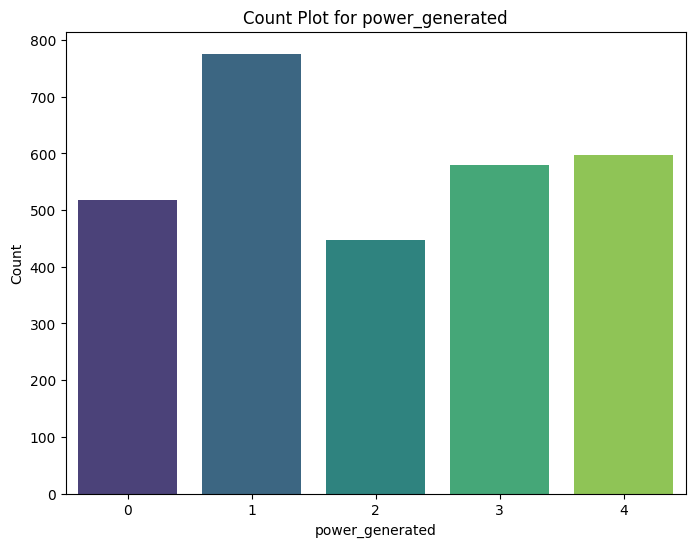

In [ ]:
# Step 1: Select categorical columns. In this case, we are specifically selecting the "sky-cover" column.
# This column is expected to contain categorical values for which a count plot will be created.
categorical_columns = power["sky_cover"]

# Create a new figure with the specified size for the count plot.
plt.figure(figsize=(8, 6))

# Generate a count plot using seaborn to visualize the distribution of categorical values.
# The 'x' argument specifies the categorical column for which the counts are plotted.
# The 'palette' argument changes the color scheme of the plot (here using 'viridis').
sns.countplot(data=power, x=categorical_columns, palette='viridis')  # You can change the color palette as needed

# Add a title to the plot, which includes the name of the column for better identification.
plt.title(f"Count Plot for {col}")

# Label the x-axis with the name of the categorical column being plotted.
plt.xlabel(col)

# Label the y-axis with "Count" to indicate the frequency of each category.
plt.ylabel('Count')

# Display the plot on the screen.
plt.show()

In [ ]:
power.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period', 'power_generated'],
      dtype='object')

In [ ]:
# Defining the list of categorical columns that will be used for categorical analysis.
# In this case, only the "sky-cover" column is included as a categorical variable.
cat_cols = ["sky_cover"]

# Defining the list of numerical columns that will be used for numerical analysis.
# This list includes columns related to solar power generation data, like temperature, wind speed, humidity, etc.
num_cols = ["distance_to_solar_noon", "temperature", "wind_direction", "wind_speed", "visibility", "humidity", "average_wind_speed_period", "average_pressure_period"]

In [ ]:
# Dropping the "power-generated" column from the DataFrame to create the feature matrix (X).
# The 'axis=1' argument specifies that we're dropping a column (not a row).
# This results in a new DataFrame 'X' containing all columns except for "power-generated", which will be used as the target variable.
X = power.drop(["power_generated"], axis = 1)

# Selecting the "power-generated" column as the target variable (y).
# This column is what we aim to predict or model, so it's separated into the 'y' variable.
y = power["power_generated"]

In [ ]:
# Displaying the feature matrix 'X' to check the dataset excluding the target variable "power-generated".
# This shows all the columns used as input features for the model.
X

,distance_to_solar_noon,temperature,wind_direction,wind_speed,sky_cover,visibility,humidity,average_wind_speed_period,average_pressure_period
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89
...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87


In [ ]:
# Converting the target variable 'y' (which is a pandas Series) into a DataFrame.
# This is useful if you want to work with 'y' as a DataFrame, for example, to apply certain operations or visualize it.
pd.DataFrame(y)

,power_generated
0,0
1,0
2,5418
3,25477
4,30069
...,...
2915,6995
2916,29490
2917,17257
2918,677


In [ ]:
# Importing the 'train_test_split' function from sklearn to split the data into training and validation (test) sets.
# This function is used to randomly split the dataset into training and test subsets.
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets.
# 'X' represents the features, and 'y' represents the target variable.
# 'test_size=0.3' means 30% of the data will be used for testing (validation), and 70% for training.
# 'random_state=107' ensures reproducibility of the random split for consistent results each time.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=107)

In [ ]:
# Printing the shape of the X_train dataset to display the number of rows and columns (features) in the training set.
# X_train contains the feature variables (independent variables) for training.
print('X Train Size:', (X_train.shape))

# Printing the shape of the y_train dataset to display the number of rows and columns (target variable) in the training set.
# y_train contains the target variable (dependent variable) for training.
print('Y Train Size:', (y_train.shape))

# Printing the shape of the X_test dataset to display the number of rows and columns (features) in the test set.
# X_test contains the feature variables (independent variables) for testing.
print('X Test Size:', (X_test.shape))

# Printing the shape of the y_test dataset to display the number of rows and columns (target variable) in the test set.
# y_test contains the target variable (dependent variable) for testing.
print('Y Test Size:', (y_test.shape))

X Train Size: (2044, 9)
Y Train Size: (2044,)
X Test Size: (876, 9)
Y Test Size: (876,)


In [ ]:
X_train.columns

Index(['distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'sky_cover', 'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period'],
      dtype='object')

In [ ]:
# Importing SimpleImputer from sklearn to handle missing values (NaNs) in the dataset.
# The SimpleImputer class provides various strategies to fill in missing data, such as mean, median, or most frequent values.
from sklearn.impute import SimpleImputer

# Initializing the SimpleImputer with the 'median' strategy to handle missing numerical data.
# This means that missing values will be replaced with the median of each column in the training set.
num_cols_imputer = SimpleImputer(strategy='median')

# Fitting the imputer to the training data (X_train) based on the numerical columns (num_cols).
# This calculates the median for each column in the training data, which will be used to replace missing values.
num_cols_imputer = num_cols_imputer.fit(X_train[num_cols])

# Transforming the training data (X_train) by replacing missing values in the numerical columns with the median values.
# The transformed values are then assigned back to the corresponding columns in X_train.
X_train[num_cols] = num_cols_imputer.transform(X_train[num_cols])

# Transforming the test data (X_test) using the same imputer fitted on the training data.
# This ensures that the same median values calculated from the training data are used to fill in missing values in the test set.
X_test[num_cols] = num_cols_imputer.transform(X_test[num_cols])

In [ ]:
# Checking for any remaining missing values (NaNs) in the X_train dataset after imputation.
# This will return the count of missing values for each column in the training set.
X_train.isnull().sum()

,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
sky_cover,0
visibility,0
humidity,0
average_wind_speed_period,0
average_pressure_period,0


In [ ]:
# Checking for any remaining missing values (NaNs) in the X_test dataset after imputation.
# This will return the count of missing values for each column in the test set.
X_test.isnull().sum()

,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
sky_cover,0
visibility,0
humidity,0
average_wind_speed_period,0
average_pressure_period,0


In [ ]:
# Creating dummy variables for categorical columns in the X_train dataset using pd.get_dummies().
# The 'cat_cols' variable specifies the categorical columns to be converted into dummy variables.
# 'drop_first=True' removes the first level of each categorical column to avoid multicollinearity.
# The resulting dummy variables are converted to integer type using .astype("int64").
X_train_dummies = pd.get_dummies(X_train[cat_cols], drop_first = True).astype("int64")

# Displaying the transformed X_train_dummies dataset, which now contains the dummy variables for the categorical columns.
X_train_dummies

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
1010,0,0,0,1
2355,0,0,0,0
1995,0,0,0,0
2637,1,0,0,0
346,0,0,0,0
...,...,...,...,...
1518,0,0,0,0
2702,1,0,0,0
454,0,0,1,0
473,0,0,1,0


In [ ]:
# Creating dummy variables for categorical columns in the X_test dataset using pd.get_dummies().
# The 'cat_cols' variable specifies the categorical columns to be converted into dummy variables.
# 'drop_first=True' removes the first level of each categorical column to avoid multicollinearity.
# The resulting dummy variables are converted to integer type using .astype("int64").
X_test_dummies = pd.get_dummies(X_test[cat_cols], drop_first=True).astype("int64")

# Displaying the transformed X_test_dummies dataset, which now contains the dummy variables for the categorical columns.
X_test_dummies

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
1641,1,0,0,0
2105,0,0,1,0
1673,0,0,0,1
2425,0,0,0,1
247,0,0,1,0
...,...,...,...,...
2590,0,0,1,0
1257,0,0,0,1
387,0,1,0,0
2695,0,0,0,1


In [ ]:
# Importing StandardScaler from sklearn to scale numerical data (standardization).
# StandardScaler standardizes the data by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler object to scale the data.
scaler = StandardScaler()

# Fitting the scaler to the numerical columns in the X_train dataset.
# The 'fit()' method calculates the mean and standard deviation for each numerical column in the training set.
scaler = scaler.fit(X_train[num_cols])

# Transforming the X_train dataset by applying the standardization to the numerical columns.
# The 'transform()' method scales the values to have zero mean and unit variance.
# The transformed data is then converted back into a DataFrame with the original column names.
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=X_train[num_cols].columns)

# Transforming the X_test dataset using the same scaler fitted on X_train.
# The test set is scaled using the same mean and standard deviation as the training set.
X_test_std = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=X_test[num_cols].columns)

In [ ]:
# Displaying the standardized version of the X_train dataset.
# This will show the numerical columns in X_train after they have been scaled to have zero mean and unit variance.
X_train_std

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,-0.215723,-1.821700,-3.011328,-1.218362,0.318895,-0.356927,-1.397700,1.278676
1,-1.190018,1.279294,0.594335,0.111288,0.318895,-0.225876,-0.712001,-1.324735
2,-1.186659,0.393295,0.450108,1.052271,0.318895,-1.274281,0.522259,0.082514
3,-0.810860,0.393295,0.594335,0.827253,0.318895,-0.094826,2.167938,-0.972923
4,-0.222058,0.983961,0.594335,-1.075169,0.318895,0.101750,-1.397700,1.137951
...,...,...,...,...,...,...,...,...
2039,0.213877,-1.378701,0.594335,0.622692,0.318895,-0.684553,0.796539,0.786139
2040,-0.078361,1.131627,0.305882,0.377218,0.318895,-0.029300,1.070819,-0.339661
2041,0.519516,-0.492703,0.594335,-0.236467,0.318895,1.281206,0.659399,0.997226
2042,0.785991,0.097963,-1.280610,-0.318291,0.318895,1.084630,-0.712001,-1.043286


In [ ]:
# Displaying the standardized version of the X_test dataset.
# This will show the numerical columns in X_test after they have been scaled to have zero mean and unit variance,
# using the same scaling parameters calculated from the X_train dataset.
X_test_std

,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,0.546240,-0.492703,0.305882,1.215920,0.318895,1.019104,-0.986280,0.926864
1,0.190019,0.097963,0.305882,0.009007,0.318895,0.625953,-1.397700,-0.902561
2,0.510576,-0.640369,0.450108,1.931886,0.318895,1.281206,1.756519,-0.832198
3,0.179908,0.983961,0.882788,-0.318291,0.318895,0.101750,-0.712001,-1.395098
4,1.157053,1.131627,0.594335,-0.481941,0.318895,0.691478,-0.163441,-0.480386
...,...,...,...,...,...,...,...,...
871,-0.121290,0.097963,0.305882,1.215920,0.318895,0.888054,0.933679,-0.410023
872,0.675020,-0.492703,-1.280610,0.029463,0.318895,1.084630,-0.300581,-0.761836
873,-1.108570,-0.345037,0.305882,0.274937,0.318895,-0.094826,-0.300581,0.575051
874,0.632938,0.836295,0.305882,0.274937,0.318895,0.888054,0.933679,-0.198936


In [ ]:
# Resetting the index of the X_train_dummies dataset.
# This ensures that the DataFrame gets a new default integer index (starting from 0).
# If the DataFrame has any custom index, this will convert it back to the default integer index.
X_train_dummies = X_train_dummies.reset_index()

# Displaying the X_train_dummies dataset after resetting its index.
# The DataFrame now has a new index, starting from 0, and the previous index is added as a column (by default).
X_train_dummies

,index,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,1010,0,0,0,1
1,2355,0,0,0,0
2,1995,0,0,0,0
3,2637,1,0,0,0
4,346,0,0,0,0
...,...,...,...,...,...
2039,1518,0,0,0,0
2040,2702,1,0,0,0
2041,454,0,0,1,0
2042,473,0,0,1,0


In [ ]:
# Resetting the index of the X_train_dummies dataset.
# This ensures that the DataFrame gets a new default integer index (starting from 0).
# If the DataFrame has any custom index, this will convert it back to the default integer index.
X_train_dummies = X_train_dummies.reset_index()

# Displaying the X_train_dummies dataset after resetting its index.
# The DataFrame now has a new index, starting from 0, and the previous index is added as a column (by default).
X_train_dummies

,level_0,index,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,0,1010,0,0,0,1
1,1,2355,0,0,0,0
2,2,1995,0,0,0,0
3,3,2637,1,0,0,0
4,4,346,0,0,0,0
...,...,...,...,...,...,...
2039,2039,1518,0,0,0,0
2040,2040,2702,1,0,0,0
2041,2041,454,0,0,1,0
2042,2042,473,0,0,1,0


In [ ]:
# Dropping the 'index' and 'level_0' columns from the X_train_dummies dataset.
# These columns were created when we reset the index previously and may no longer be needed.
# The 'axis=1' argument specifies that we want to drop columns, not rows.
X_train_dummies = X_train_dummies.drop(["index", "level_0"], axis=1)

# Displaying the X_train_dummies dataset after dropping the 'index' and 'level_0' columns.
# The DataFrame now contains only the dummy variables without the additional index columns.
X_train_dummies

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,0,0,0,1
1,0,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
2039,0,0,0,0
2040,1,0,0,0
2041,0,0,1,0
2042,0,0,1,0


In [ ]:
# Resetting the index of the X_test_dummies dataset.
# This ensures that the DataFrame gets a new default integer index (starting from 0).
# If the DataFrame had a custom index, this will convert it back to the default integer index.
X_test_dummies = X_test_dummies.reset_index()

# Displaying the X_test_dummies dataset after resetting its index.
# The DataFrame now has a new index, starting from 0, and the previous index is added as a column (by default).
X_test_dummies

,index,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,1641,1,0,0,0
1,2105,0,0,1,0
2,1673,0,0,0,1
3,2425,0,0,0,1
4,247,0,0,1,0
...,...,...,...,...,...
871,2590,0,0,1,0
872,1257,0,0,0,1
873,387,0,1,0,0
874,2695,0,0,0,1


In [ ]:
# Resetting the index of the X_test_dummies dataset.
# This ensures that the DataFrame gets a new default integer index (starting from 0).
# If the DataFrame had a custom index, this will convert it back to the default integer index.
X_test_dummies = X_test_dummies.reset_index()

# Displaying the X_test_dummies dataset after resetting its index.
# The DataFrame now has a new index, starting from 0, and the previous index is added as a column (by default).
X_test_dummies

,level_0,index,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,0,1641,1,0,0,0
1,1,2105,0,0,1,0
2,2,1673,0,0,0,1
3,3,2425,0,0,0,1
4,4,247,0,0,1,0
...,...,...,...,...,...,...
871,871,2590,0,0,1,0
872,872,1257,0,0,0,1
873,873,387,0,1,0,0
874,874,2695,0,0,0,1


In [ ]:
# Dropping the 'index' and 'level_0' columns from the X_test_dummies dataset.
# These columns were created when we reset the index previously and may no longer be needed.
# The 'axis=1' argument specifies that we want to drop columns (not rows).
X_test_dummies = X_test_dummies.drop(["index", "level_0"], axis=1)

# Displaying the X_test_dummies dataset after dropping the 'index' and 'level_0' columns.
# The DataFrame now contains only the dummy variables without the additional index columns.
X_test_dummies

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
871,0,0,1,0
872,0,0,0,1
873,0,1,0,0
874,0,0,0,1


In [ ]:
# Concatenating the X_train_dummies and X_train_std DataFrames along the columns (axis=1).
# This combines the dummy variables for the categorical features (X_train_dummies) and the standardized
# numerical features (X_train_std) into a single DataFrame.
final_X_train = pd.concat([X_train_dummies, X_train_std], axis=1)

# Displaying the final_X_train dataset after concatenating the dummy variables and standardized numerical features.
# The DataFrame now contains both the transformed categorical and numerical features.
final_X_train

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,0,0,0,1,-0.215723,-1.821700,-3.011328,-1.218362,0.318895,-0.356927,-1.397700,1.278676
1,0,0,0,0,-1.190018,1.279294,0.594335,0.111288,0.318895,-0.225876,-0.712001,-1.324735
2,0,0,0,0,-1.186659,0.393295,0.450108,1.052271,0.318895,-1.274281,0.522259,0.082514
3,1,0,0,0,-0.810860,0.393295,0.594335,0.827253,0.318895,-0.094826,2.167938,-0.972923
4,0,0,0,0,-0.222058,0.983961,0.594335,-1.075169,0.318895,0.101750,-1.397700,1.137951
...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0,0,0,0,0.213877,-1.378701,0.594335,0.622692,0.318895,-0.684553,0.796539,0.786139
2040,1,0,0,0,-0.078361,1.131627,0.305882,0.377218,0.318895,-0.029300,1.070819,-0.339661
2041,0,0,1,0,0.519516,-0.492703,0.594335,-0.236467,0.318895,1.281206,0.659399,0.997226
2042,0,0,1,0,0.785991,0.097963,-1.280610,-0.318291,0.318895,1.084630,-0.712001,-1.043286


In [ ]:
# Checking for any missing (null) values in the final_X_train dataset.
# The .isnull().sum() method will return the total number of missing values (NaNs) for each column.
final_X_train.isnull().sum()

,0
sky_cover_1,0
sky_cover_2,0
sky_cover_3,0
sky_cover_4,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
visibility,0
humidity,0


In [ ]:
# Concatenating the X_test_dummies and X_test_std DataFrames along the columns (axis=1).
# This combines the dummy variables for the categorical features (X_test_dummies) and the standardized
# numerical features (X_test_std) into a single DataFrame for the test set.
final_X_test = pd.concat([X_test_dummies, X_test_std], axis=1)

# Displaying the final_X_test dataset after concatenating the dummy variables and standardized numerical features.
# The DataFrame now contains both the transformed categorical and numerical features for the test set.
final_X_test

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,1,0,0,0,0.546240,-0.492703,0.305882,1.215920,0.318895,1.019104,-0.986280,0.926864
1,0,0,1,0,0.190019,0.097963,0.305882,0.009007,0.318895,0.625953,-1.397700,-0.902561
2,0,0,0,1,0.510576,-0.640369,0.450108,1.931886,0.318895,1.281206,1.756519,-0.832198
3,0,0,0,1,0.179908,0.983961,0.882788,-0.318291,0.318895,0.101750,-0.712001,-1.395098
4,0,0,1,0,1.157053,1.131627,0.594335,-0.481941,0.318895,0.691478,-0.163441,-0.480386
...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0,1,0,-0.121290,0.097963,0.305882,1.215920,0.318895,0.888054,0.933679,-0.410023
872,0,0,0,1,0.675020,-0.492703,-1.280610,0.029463,0.318895,1.084630,-0.300581,-0.761836
873,0,1,0,0,-1.108570,-0.345037,0.305882,0.274937,0.318895,-0.094826,-0.300581,0.575051
874,0,0,0,1,0.632938,0.836295,0.305882,0.274937,0.318895,0.888054,0.933679,-0.198936


In [ ]:
# Checking for any missing (null) values in the final_X_test dataset.
# The .isnull().sum() method will return the total number of missing values (NaNs) for each column in the final_X_test DataFrame.
final_X_test.isnull().sum()

,0
sky_cover_1,0
sky_cover_2,0
sky_cover_3,0
sky_cover_4,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
visibility,0
humidity,0


In [ ]:
y_train = y_train.reset_index()
y_train

,index,power_generated
0,1010,0
1,2355,29010
2,1995,29577
3,2637,20769
4,346,3473
...,...,...
2039,1518,244
2040,2702,1452
2041,454,0
2042,473,0


In [ ]:
y_train = y_train.reset_index()
y_train

,level_0,index,power_generated
0,0,1010,0
1,1,2355,29010
2,2,1995,29577
3,3,2637,20769
4,4,346,3473
...,...,...,...
2039,2039,1518,244
2040,2040,2702,1452
2041,2041,454,0
2042,2042,473,0


In [ ]:
y_train = y_train.drop(["level_0", "index"], axis = 1)
y_train

,power_generated
0,0
1,29010
2,29577
3,20769
4,3473
...,...
2039,244
2040,1452
2041,0
2042,0


In [ ]:
y_test = y_test.reset_index()
y_test

,index,power_generated
0,1641,0
1,2105,0
2,1673,0
3,2425,0
4,247,0
...,...,...
871,2590,1844
872,1257,0
873,387,17121
874,2695,0


In [ ]:
y_test = y_test.reset_index()
y_test

,level_0,index,power_generated
0,0,1641,0
1,1,2105,0
2,2,1673,0
3,3,2425,0
4,4,247,0
...,...,...,...
871,871,2590,1844
872,872,1257,0
873,873,387,17121
874,874,2695,0


In [ ]:
y_test = y_test.drop(["level_0", "index"], axis = 1)
y_test

,power_generated
0,0
1,0
2,0
3,0
4,0
...,...
871,1844
872,0
873,17121
874,0


In [ ]:
final_train_data = pd.concat([final_X_train, y_train], axis = 1)
final_train_data

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,0,0,0,1,-0.215723,-1.821700,-3.011328,-1.218362,0.318895,-0.356927,-1.397700,1.278676,0
1,0,0,0,0,-1.190018,1.279294,0.594335,0.111288,0.318895,-0.225876,-0.712001,-1.324735,29010
2,0,0,0,0,-1.186659,0.393295,0.450108,1.052271,0.318895,-1.274281,0.522259,0.082514,29577
3,1,0,0,0,-0.810860,0.393295,0.594335,0.827253,0.318895,-0.094826,2.167938,-0.972923,20769
4,0,0,0,0,-0.222058,0.983961,0.594335,-1.075169,0.318895,0.101750,-1.397700,1.137951,3473
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0,0,0,0,0.213877,-1.378701,0.594335,0.622692,0.318895,-0.684553,0.796539,0.786139,244
2040,1,0,0,0,-0.078361,1.131627,0.305882,0.377218,0.318895,-0.029300,1.070819,-0.339661,1452
2041,0,0,1,0,0.519516,-0.492703,0.594335,-0.236467,0.318895,1.281206,0.659399,0.997226,0
2042,0,0,1,0,0.785991,0.097963,-1.280610,-0.318291,0.318895,1.084630,-0.712001,-1.043286,0


In [ ]:
final_train_data.isnull().sum()

,0
sky_cover_1,0
sky_cover_2,0
sky_cover_3,0
sky_cover_4,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
visibility,0
humidity,0


In [ ]:
final_test_data = pd.concat([final_X_test, y_test], axis = 1)
final_test_data

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,1,0,0,0,0.546240,-0.492703,0.305882,1.215920,0.318895,1.019104,-0.986280,0.926864,0
1,0,0,1,0,0.190019,0.097963,0.305882,0.009007,0.318895,0.625953,-1.397700,-0.902561,0
2,0,0,0,1,0.510576,-0.640369,0.450108,1.931886,0.318895,1.281206,1.756519,-0.832198,0
3,0,0,0,1,0.179908,0.983961,0.882788,-0.318291,0.318895,0.101750,-0.712001,-1.395098,0
4,0,0,1,0,1.157053,1.131627,0.594335,-0.481941,0.318895,0.691478,-0.163441,-0.480386,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0,1,0,-0.121290,0.097963,0.305882,1.215920,0.318895,0.888054,0.933679,-0.410023,1844
872,0,0,0,1,0.675020,-0.492703,-1.280610,0.029463,0.318895,1.084630,-0.300581,-0.761836,0
873,0,1,0,0,-1.108570,-0.345037,0.305882,0.274937,0.318895,-0.094826,-0.300581,0.575051,17121
874,0,0,0,1,0.632938,0.836295,0.305882,0.274937,0.318895,0.888054,0.933679,-0.198936,0


In [ ]:
final_test_data.isnull().sum()

,0
sky_cover_1,0
sky_cover_2,0
sky_cover_3,0
sky_cover_4,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
visibility,0
humidity,0


## Data where outliers are replaced with median value

In [ ]:
replaced_train_data = final_train_data

# Replace outliers with the median for each column
for col in replaced_train_data:
    # Calculate the IQR for the column
    Q1 = replaced_train_data[col].quantile(0.25)  # First quartile
    Q3 = replaced_train_data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Calculate the median of the column
    median = replaced_train_data[col].median()

    # Replace outliers with the median
    replaced_train_data[col] = np.where(
        (replaced_train_data[col] < lower_limit) | (replaced_train_data[col] > upper_limit),
        median,
        replaced_train_data[col]
    )

# Print the updated data
replaced_train_data

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,0.0,0.0,0.0,0.0,-0.215723,-1.821700,0.305882,-1.218362,0.318895,-0.356927,-1.397700,1.278676,0.0
1,0.0,0.0,0.0,0.0,-1.190018,1.279294,0.594335,0.111288,0.318895,-0.225876,-0.712001,-1.324735,29010.0
2,0.0,0.0,0.0,0.0,-1.186659,0.393295,0.450108,1.052271,0.318895,-1.274281,0.522259,0.082514,29577.0
3,1.0,0.0,0.0,0.0,-0.810860,0.393295,0.594335,0.827253,0.318895,-0.094826,2.167938,-0.972923,20769.0
4,0.0,0.0,0.0,0.0,-0.222058,0.983961,0.594335,-1.075169,0.318895,0.101750,-1.397700,1.137951,3473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0.0,0.0,0.0,0.0,0.213877,-1.378701,0.594335,0.622692,0.318895,-0.684553,0.796539,0.786139,244.0
2040,1.0,0.0,0.0,0.0,-0.078361,1.131627,0.305882,0.377218,0.318895,-0.029300,1.070819,-0.339661,1452.0
2041,0.0,0.0,0.0,0.0,0.519516,-0.492703,0.594335,-0.236467,0.318895,1.281206,0.659399,0.997226,0.0
2042,0.0,0.0,0.0,0.0,0.785991,0.097963,0.305882,-0.318291,0.318895,1.084630,-0.712001,-1.043286,0.0


In [ ]:
replaced_test_data = final_test_data

# Replace outliers with the median for each column
for col in replaced_test_data:
    # Calculate the IQR for the column
    Q1 = replaced_test_data[col].quantile(0.25)  # First quartile
    Q3 = replaced_test_data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Calculate the median of the column
    median = replaced_test_data[col].median()

    # Replace outliers with the median
    replaced_test_data[col] = np.where(
        (replaced_test_data[col] < lower_limit) | (replaced_test_data[col] > upper_limit),
        median,
        replaced_test_data[col]
    )

# Print the updated data
replaced_test_data

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,1.0,0.0,0.0,0.0,0.546240,-0.492703,0.305882,1.215920,0.318895,1.019104,-0.986280,0.926864,0.0
1,0.0,0.0,0.0,0.0,0.190019,0.097963,0.305882,0.009007,0.318895,0.625953,-1.397700,-0.902561,0.0
2,0.0,0.0,0.0,0.0,0.510576,-0.640369,0.450108,1.931886,0.318895,1.281206,1.756519,-0.832198,0.0
3,0.0,0.0,0.0,0.0,0.179908,0.983961,0.882788,-0.318291,0.318895,0.101750,-0.712001,-1.395098,0.0
4,0.0,0.0,0.0,0.0,1.157053,1.131627,0.594335,-0.481941,0.318895,0.691478,-0.163441,-0.480386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.0,0.0,0.0,0.0,-0.121290,0.097963,0.305882,1.215920,0.318895,0.888054,0.933679,-0.410023,1844.0
872,0.0,0.0,0.0,0.0,0.675020,-0.492703,0.305882,0.029463,0.318895,1.084630,-0.300581,-0.761836,0.0
873,0.0,0.0,0.0,0.0,-1.108570,-0.345037,0.305882,0.274937,0.318895,-0.094826,-0.300581,0.575051,17121.0
874,0.0,0.0,0.0,0.0,0.632938,0.836295,0.305882,0.274937,0.318895,0.888054,0.933679,-0.198936,0.0


In [ ]:
replaced_X_train = replaced_train_data.drop(["power_generated"], axis = 1)
replaced_y_train = replaced_train_data["power_generated"]

In [ ]:
replaced_X_train

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,0.0,0.0,0.0,0.0,-0.215723,-1.821700,0.305882,-1.218362,0.318895,-0.356927,-1.397700,1.278676
1,0.0,0.0,0.0,0.0,-1.190018,1.279294,0.594335,0.111288,0.318895,-0.225876,-0.712001,-1.324735
2,0.0,0.0,0.0,0.0,-1.186659,0.393295,0.450108,1.052271,0.318895,-1.274281,0.522259,0.082514
3,1.0,0.0,0.0,0.0,-0.810860,0.393295,0.594335,0.827253,0.318895,-0.094826,2.167938,-0.972923
4,0.0,0.0,0.0,0.0,-0.222058,0.983961,0.594335,-1.075169,0.318895,0.101750,-1.397700,1.137951
...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0.0,0.0,0.0,0.0,0.213877,-1.378701,0.594335,0.622692,0.318895,-0.684553,0.796539,0.786139
2040,1.0,0.0,0.0,0.0,-0.078361,1.131627,0.305882,0.377218,0.318895,-0.029300,1.070819,-0.339661
2041,0.0,0.0,0.0,0.0,0.519516,-0.492703,0.594335,-0.236467,0.318895,1.281206,0.659399,0.997226
2042,0.0,0.0,0.0,0.0,0.785991,0.097963,0.305882,-0.318291,0.318895,1.084630,-0.712001,-1.043286


In [ ]:
replaced_y_train

,power_generated
0,0.0
1,29010.0
2,29577.0
3,20769.0
4,3473.0
...,...
2039,244.0
2040,1452.0
2041,0.0
2042,0.0


In [ ]:
replaced_X_test = replaced_test_data.drop(["power_generated"], axis = 1)
replaced_y_test = replaced_test_data["power_generated"]

In [ ]:
replaced_X_test

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,1.0,0.0,0.0,0.0,0.546240,-0.492703,0.305882,1.215920,0.318895,1.019104,-0.986280,0.926864
1,0.0,0.0,0.0,0.0,0.190019,0.097963,0.305882,0.009007,0.318895,0.625953,-1.397700,-0.902561
2,0.0,0.0,0.0,0.0,0.510576,-0.640369,0.450108,1.931886,0.318895,1.281206,1.756519,-0.832198
3,0.0,0.0,0.0,0.0,0.179908,0.983961,0.882788,-0.318291,0.318895,0.101750,-0.712001,-1.395098
4,0.0,0.0,0.0,0.0,1.157053,1.131627,0.594335,-0.481941,0.318895,0.691478,-0.163441,-0.480386
...,...,...,...,...,...,...,...,...,...,...,...,...
871,0.0,0.0,0.0,0.0,-0.121290,0.097963,0.305882,1.215920,0.318895,0.888054,0.933679,-0.410023
872,0.0,0.0,0.0,0.0,0.675020,-0.492703,0.305882,0.029463,0.318895,1.084630,-0.300581,-0.761836
873,0.0,0.0,0.0,0.0,-1.108570,-0.345037,0.305882,0.274937,0.318895,-0.094826,-0.300581,0.575051
874,0.0,0.0,0.0,0.0,0.632938,0.836295,0.305882,0.274937,0.318895,0.888054,0.933679,-0.198936


In [ ]:
replaced_y_test

,power_generated
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
871,1844.0
872,0.0
873,17121.0
874,0.0


## Data where Outliers are Removed

In [ ]:
# Make a copy to avoid modifying the original dataset
cleaned_train_data = final_train_data.copy()

# Loop through all numerical columns
for column in cleaned_train_data.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate Q1, Q3, and IQR
    Q1 = cleaned_train_data[column].quantile(0.25)
    Q3 = cleaned_train_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data within the bounds
    cleaned_train_data = cleaned_train_data[(cleaned_train_data[column] >= lower_bound) & (cleaned_train_data[column] <= upper_bound)]

# Display the cleaned dataset
cleaned_train_data

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,0.0,0.0,0.0,0.0,-0.215723,-1.821700,0.305882,-1.218362,0.318895,-0.356927,-1.397700,1.278676,0.0
3,1.0,0.0,0.0,0.0,-0.810860,0.393295,0.594335,0.827253,0.318895,-0.094826,2.167938,-0.972923,20769.0
4,0.0,0.0,0.0,0.0,-0.222058,0.983961,0.594335,-1.075169,0.318895,0.101750,-1.397700,1.137951,3473.0
5,0.0,0.0,0.0,0.0,1.653978,-0.640369,0.450108,-0.850151,0.318895,0.232801,-1.397700,0.504689,0.0
6,0.0,0.0,0.0,0.0,-0.828397,1.279294,0.594335,0.111288,0.318895,-2.060585,1.893658,-1.746910,21260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0.0,0.0,0.0,0.0,0.213877,-1.378701,0.594335,0.622692,0.318895,-0.684553,0.796539,0.786139,244.0
2040,1.0,0.0,0.0,0.0,-0.078361,1.131627,0.305882,0.377218,0.318895,-0.029300,1.070819,-0.339661,1452.0
2041,0.0,0.0,0.0,0.0,0.519516,-0.492703,0.594335,-0.236467,0.318895,1.281206,0.659399,0.997226,0.0
2042,0.0,0.0,0.0,0.0,0.785991,0.097963,0.305882,-0.318291,0.318895,1.084630,-0.712001,-1.043286,0.0


In [ ]:
# Make a copy to avoid modifying the original dataset
cleaned_test_data = final_test_data.copy()

# Loop through all numerical columns
for column in cleaned_test_data.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate Q1, Q3, and IQR
    Q1 = cleaned_test_data[column].quantile(0.25)
    Q3 = cleaned_test_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data within the bounds
    cleaned_test_data = cleaned_test_data[(cleaned_test_data[column] >= lower_bound) & (cleaned_test_data[column] <= upper_bound)]

# Display the cleaned dataset
cleaned_test_data

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period,power_generated
0,1.0,0.0,0.0,0.0,0.546240,-0.492703,0.305882,1.215920,0.318895,1.019104,-0.986280,0.926864,0.0
1,0.0,0.0,0.0,0.0,0.190019,0.097963,0.305882,0.009007,0.318895,0.625953,-1.397700,-0.902561,0.0
2,0.0,0.0,0.0,0.0,0.510576,-0.640369,0.450108,1.931886,0.318895,1.281206,1.756519,-0.832198,0.0
3,0.0,0.0,0.0,0.0,0.179908,0.983961,0.882788,-0.318291,0.318895,0.101750,-0.712001,-1.395098,0.0
4,0.0,0.0,0.0,0.0,1.157053,1.131627,0.594335,-0.481941,0.318895,0.691478,-0.163441,-0.480386,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,1.0,0.0,0.0,0.0,0.215448,0.540962,0.738561,0.929534,0.318895,1.084630,-0.163441,-0.972923,0.0
871,0.0,0.0,0.0,0.0,-0.121290,0.097963,0.305882,1.215920,0.318895,0.888054,0.933679,-0.410023,1844.0
872,0.0,0.0,0.0,0.0,0.675020,-0.492703,0.305882,0.029463,0.318895,1.084630,-0.300581,-0.761836,0.0
873,0.0,0.0,0.0,0.0,-1.108570,-0.345037,0.305882,0.274937,0.318895,-0.094826,-0.300581,0.575051,17121.0


In [ ]:
cleaned_X_train = cleaned_train_data.drop(["power_generated"], axis = 1)
cleaned_y_train = cleaned_train_data["power_generated"]

In [ ]:
cleaned_X_train

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,0.0,0.0,0.0,0.0,-0.215723,-1.821700,0.305882,-1.218362,0.318895,-0.356927,-1.397700,1.278676
3,1.0,0.0,0.0,0.0,-0.810860,0.393295,0.594335,0.827253,0.318895,-0.094826,2.167938,-0.972923
4,0.0,0.0,0.0,0.0,-0.222058,0.983961,0.594335,-1.075169,0.318895,0.101750,-1.397700,1.137951
5,0.0,0.0,0.0,0.0,1.653978,-0.640369,0.450108,-0.850151,0.318895,0.232801,-1.397700,0.504689
6,0.0,0.0,0.0,0.0,-0.828397,1.279294,0.594335,0.111288,0.318895,-2.060585,1.893658,-1.746910
...,...,...,...,...,...,...,...,...,...,...,...,...
2039,0.0,0.0,0.0,0.0,0.213877,-1.378701,0.594335,0.622692,0.318895,-0.684553,0.796539,0.786139
2040,1.0,0.0,0.0,0.0,-0.078361,1.131627,0.305882,0.377218,0.318895,-0.029300,1.070819,-0.339661
2041,0.0,0.0,0.0,0.0,0.519516,-0.492703,0.594335,-0.236467,0.318895,1.281206,0.659399,0.997226
2042,0.0,0.0,0.0,0.0,0.785991,0.097963,0.305882,-0.318291,0.318895,1.084630,-0.712001,-1.043286


In [ ]:
cleaned_y_train

,power_generated
0,0.0
3,20769.0
4,3473.0
5,0.0
6,21260.0
...,...
2039,244.0
2040,1452.0
2041,0.0
2042,0.0


In [ ]:
cleaned_X_test = cleaned_test_data.drop(["power_generated"], axis = 1)
cleaned_y_test = cleaned_test_data["power_generated"]

In [ ]:
cleaned_X_test

,sky_cover_1,sky_cover_2,sky_cover_3,sky_cover_4,distance_to_solar_noon,temperature,wind_direction,wind_speed,visibility,humidity,average_wind_speed_period,average_pressure_period
0,1.0,0.0,0.0,0.0,0.546240,-0.492703,0.305882,1.215920,0.318895,1.019104,-0.986280,0.926864
1,0.0,0.0,0.0,0.0,0.190019,0.097963,0.305882,0.009007,0.318895,0.625953,-1.397700,-0.902561
2,0.0,0.0,0.0,0.0,0.510576,-0.640369,0.450108,1.931886,0.318895,1.281206,1.756519,-0.832198
3,0.0,0.0,0.0,0.0,0.179908,0.983961,0.882788,-0.318291,0.318895,0.101750,-0.712001,-1.395098
4,0.0,0.0,0.0,0.0,1.157053,1.131627,0.594335,-0.481941,0.318895,0.691478,-0.163441,-0.480386
...,...,...,...,...,...,...,...,...,...,...,...,...
870,1.0,0.0,0.0,0.0,0.215448,0.540962,0.738561,0.929534,0.318895,1.084630,-0.163441,-0.972923
871,0.0,0.0,0.0,0.0,-0.121290,0.097963,0.305882,1.215920,0.318895,0.888054,0.933679,-0.410023
872,0.0,0.0,0.0,0.0,0.675020,-0.492703,0.305882,0.029463,0.318895,1.084630,-0.300581,-0.761836
873,0.0,0.0,0.0,0.0,-1.108570,-0.345037,0.305882,0.274937,0.318895,-0.094826,-0.300581,0.575051


In [ ]:
cleaned_y_test

,power_generated
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
870,0.0
871,1844.0
872,0.0
873,17121.0


# MODEL BUILDING

## Building Models using Complete data

## OLS Models

### Model_1

In [ ]:
# full data
# replaced data
# cleaned data

In [ ]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 15.5 MB/s eta 0:00:00


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
final_train_data.columns

Index(['sky_cover_1', 'sky_cover_2', 'sky_cover_3', 'sky_cover_4',
       'distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period', 'power_generated'],
      dtype='object')

In [ ]:
formula = (
    "power_generated ~ sky_cover_1 + sky_cover_2 + sky_cover_3 + sky_cover_4 + "
    "distance_to_solar_noon + temperature + wind_direction + wind_speed + "
    "visibility + humidity + average_wind_speed_period + average_pressure_period"
)

In [ ]:
model_1 = smf.ols(formula = formula, data = final_train_data).fit()
model_1

In [ ]:
# Get the summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     224.3
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          7.32e-273
Time:                        03:18:29   Log-Likelihood:                -20825.
No. Observations:                2044   AIC:                         4.167e+04
Df Residuals:                    2035   BIC:                         4.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
y_train_preds_1 = model_1.predict(final_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_1        # displaying the predictions

,0
0,8168.661837
1,12095.718900
2,14519.147514
3,10661.576053
4,7788.718976
...,...
2039,6422.861822
2040,6991.318930
2041,1220.776114
2042,-864.395377


In [ ]:
y_test_preds_1 = model_1.predict(final_test_data)
y_test_preds_1

,0
0,1218.804683
1,2979.547484
2,-238.481085
3,4693.747469
4,-1160.623932
...,...
871,4153.347499
872,-340.509654
873,11744.947530
874,867.261791


In [ ]:
rmse = np.sqrt(np.mean((np.array(final_train_data["power_generated"])-np.array(y_train_preds_1))**2))
rmse

6433.403850278232

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_train_preds_1))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_preds_1))
print("R^2 Score:", r2_score(y_train, y_train_preds_1))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_preds_1))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_preds_1))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_preds_1))
print("R^2 Score:", r2_score(y_test, y_test_preds_1))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_preds_1))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 4923.3698229352685
Mean Squared Error (MSE): 43692165.2379664
R^2 Score: 0.5801235857997646
Root Mean Squared Error (RMSE): 6610.004934791381

Test Performance:
Mean Absolute Error (MAE): 4954.75119347409
Mean Squared Error (MSE): 45486073.81366632
R^2 Score: 0.5921493364590062
Root Mean Squared Error (RMSE): 6744.336425006268


### Model_2

## taken columns where p_value < 0.05

In [ ]:
formula_2 = (
    "power_generated ~ distance_to_solar_noon + humidity + average_pressure_period"
)

In [ ]:
model_2 = smf.ols(formula=formula_2, data=final_train_data).fit()

In [ ]:
# Get the summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     591.6
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.26e-276
Time:                        03:18:29   Log-Likelihood:                -20831.
No. Observations:                2044   AIC:                         4.167e+04
Df Residuals:                    2040   BIC:                         4.169e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5

In [ ]:
y_train_preds_2 = model_2.predict(final_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_2       # displaying the predictions

,0
0,8336.947225
1,11948.480361
2,14859.128203
3,9866.998612
4,7279.205723
...,...
2039,6692.960361
2040,6249.885390
2041,795.178863
2042,-937.023976


In [ ]:
y_test_preds_2 = model_2.predict(final_test_data)
y_test_preds_2

,0
0,1221.523125
1,3182.880863
2,105.186554
3,4217.284608
4,-1711.483714
...,...
871,4373.097624
872,-259.695512
873,12002.873569
874,623.419723


In [ ]:
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_train_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_preds_2))
print("R^2 Score:", r2_score(y_train, y_train_preds_2))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_preds_2))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_preds_2))
print("R^2 Score:", r2_score(y_test, y_test_preds_2))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_preds_2))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 4945.03539517736
Mean Squared Error (MSE): 44408008.281031586
R^2 Score: 0.5732444208873512
Root Mean Squared Error (RMSE): 6663.933394102284

Test Performance:
Mean Absolute Error (MAE): 4944.4986715372315
Mean Squared Error (MSE): 46406381.84284714
R^2 Score: 0.5838973989121186
Root Mean Squared Error (RMSE): 6812.222973658976


### Model_3

### Same as model_1 but applied log transformation

In [ ]:
final_train_data.columns

Index(['sky_cover_1', 'sky_cover_2', 'sky_cover_3', 'sky_cover_4',
       'distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period', 'power_generated'],
      dtype='object')

In [ ]:
formula_3 = (
    "power_generated ~ sky_cover_1 + sky_cover_2 + sky_cover_3 + sky_cover_4 + "
    "np.log(distance_to_solar_noon + temperature + wind_direction + wind_speed + "
    "visibility + humidity + average_wind_speed_period + average_pressure_period)"
    )

In [ ]:
model_3 = smf.ols(formula=formula_3, data=final_train_data).fit()

In [ ]:
# Get the summary
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     52.88
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           8.16e-23
Time:                        03:18:29   Log-Likelihood:                -13582.
No. Observations:                1317   AIC:                         2.717e+04
Df Residuals:                    1314   BIC:                         2.719e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                               coef    std err          t      P>|t|      [0.025  

In [ ]:
final_train_data.isnull().sum()

,0
sky_cover_1,0
sky_cover_2,0
sky_cover_3,0
sky_cover_4,0
distance_to_solar_noon,0
temperature,0
wind_direction,0
wind_speed,0
visibility,0
humidity,0


In [ ]:
y_train_preds_3 = model_3.predict(final_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_3       # displaying the predictions

,0
0,NaN
1,NaN
2,5727.632545
3,4476.112350
4,5334.541235
...,...
2039,3355.832654
2040,4233.896725
2041,1378.929116
2042,5030.341945


In [ ]:
y_test_preds_3 = model_3.predict(final_test_data)
y_test_preds_3

,0
0,4169.170298
1,NaN
2,869.937934
3,9752.998671
4,1893.581642
...,...
871,1604.335235
872,4088.580442
873,NaN
874,1206.632989


In [ ]:
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_train_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_train_preds_3))
print("R^2 Score:", r2_score(y_train, y_train_preds_3))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_preds_3))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_preds_3))
print("R^2 Score:", r2_score(y_test, y_test_preds_3))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_preds_3))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:


ValueError: Input contains NaN.

### Model_4 same as model_2 but applied log transformation to the target variable

In [ ]:
formula_4 = (
    "np.log(power_generated) ~ sky_cover_1 + sky_cover_2 + sky_cover_3 + sky_cover_4 + "
    "distance_to_solar_noon + temperature + wind_direction + wind_speed + "
    "visibility + humidity + average_wind_speed_period + average_pressure_period"
    )

In [ ]:
model_4 = smf.ols(formula=formula_4, data=final_train_data).fit()

In [ ]:
# Get the summary
print(model_4.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log(power_generated)   R-squared:                         nan
Model:                                 OLS   Adj. R-squared:                    nan
Method:                      Least Squares   F-statistic:                       nan
Date:                     Mon, 02 Dec 2024   Prob (F-statistic):                nan
Time:                             03:18:42   Log-Likelihood:                    nan
No. Observations:                     2044   AIC:                               nan
Df Residuals:                         2035   BIC:                               nan
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
y_train_preds_4 = model_4.predict(final_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_4       # displaying the predictions

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2039,NaN
2040,NaN
2041,NaN
2042,NaN


## Decision Tree Models for Full data

### dt_model_1 with full data

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Decision Tree Regressor
dt_model_1 = DecisionTreeRegressor()

# Train the model
dt_model_1.fit(final_X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_train_preds_1 = dt_model_1.predict(final_X_train)
dt_train_preds_1

array([    0., 29010., 29577., ...,     0.,     0.,  1561.])

In [ ]:
# Predict on the test set
dt_test_preds_1 = dt_model_1.predict(final_X_test)
dt_test_preds_1

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       3.2235e+04, 6.3520e+03, 0.0000e+00, 0.0000e+00, 2.3990e+03,
       1.3893e+04, 0.0000e+00, 0.0000e+00, 2.8147e+04, 2.9330e+03,
       3.1885e+04, 0.0000e+00, 1.1279e+04, 2.0315e+04, 7.2000e+01,
       0.0000e+00, 1.1000e+01, 4.9440e+03, 0.0000e+00, 2.9768e+04,
       0.0000e+00, 0.0000e+00, 2.2558e+04, 0.0000e+00, 0.0000e+00,
       5.4510e+03, 0.0000e+00, 6.9950e+03, 8.3180e+03, 0.0000e+00,
       9.4000e+02, 2.0826e+04, 0.0000e+00, 0.0000e+00, 2.6744e+04,
       0.0000e+00, 3.3200e+02, 2.0628e+04, 2.1150e+04, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1510e+03, 0.0000e+00,
       1.7210e+03, 0.0000e+00, 4.3600e+02, 0.0000e+00, 0.0000e+00,
       7.5080e+03, 2.8838e+04, 0.0000e+00, 2.0746e+04, 0.0000e+00,
       3.2187e+04, 0.0000e+00, 3.4450e+03, 1.1490e+03, 0.0000e+00,
       4.7800e+03, 1.2760e+03, 1.4692e+04, 0.0000e+00, 0.0000e+00,
       1.8330e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, dt_train_preds_1))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, dt_train_preds_1))
print("R^2 Score:", r2_score(y_train, dt_train_preds_1))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, dt_train_preds_1))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, dt_test_preds_1))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, dt_test_preds_1))
print("R^2 Score:", r2_score(y_test, dt_test_preds_1))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, dt_test_preds_1))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
R^2 Score: 1.0
Root Mean Squared Error (RMSE): 0.0

Test Performance:
Mean Absolute Error (MAE): 1757.7511415525114
Mean Squared Error (MSE): 15862465.926940639
R^2 Score: 0.857769275048853
Root Mean Squared Error (RMSE): 3982.7711366510425


In [ ]:
"""from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [3, 5, 7, 8, 9, None],
    'min_samples_split': list(range(15, 30)),
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize the Decision Tree Regressor
dt_model_grid = DecisionTreeRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=dt_model_grid,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R² score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit Grid Search to the data
grid_search.fit(final_X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R² Score:", best_score)"""

'from sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'criterion\': [\'squared_error\', \'friedman_mse\', \'absolute_error\'],\n    \'max_depth\': [3, 5, 7, 8, 9, None],\n    \'min_samples_split\': list(range(15, 30)),\n    \'min_samples_leaf\': [1, 2, 3, 4]\n}\n\n# Initialize the Decision Tree Regressor\ndt_model_grid = DecisionTreeRegressor(random_state=42)\n\n# Initialize Grid Search\ngrid_search = GridSearchCV(\n    estimator=dt_model_grid,\n    param_grid=param_grid,\n    scoring=\'r2\',  # Optimize for R² score\n    cv=5,  # 5-fold cross-validation\n    verbose=2,\n    n_jobs=-1  # Use all available cores\n)\n\n# Fit Grid Search to the data\ngrid_search.fit(final_X_train, y_train)\n\n# Get the best parameters and the best score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint("Best Parameters:", best_params)\nprint("Best Cross-Validation R² Score:", best_score)'

### dt_model_2 build based on best parameters by gridsearch CV

In [ ]:
# Initialize the Decision Tree Regressor
dt_model_2 = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 7, min_samples_leaf = 2, min_samples_split =  24)

# Train the model
dt_model_2.fit(final_X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=24)

In [ ]:
# Predict on the train set
dt_train_preds_2 = dt_model_2.predict(final_X_train)

# Evaluate the best model
print("\nTraining Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, dt_train_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, dt_train_preds_2))
print("R² Score:", r2_score(y_train, dt_train_preds_2))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, dt_train_preds_2))
print("Root Mean Squared Error (RMSE):", rmse)

# Predict on the test set
dt_test_preds_2 = dt_model_2.predict(final_X_test)

# Evaluate the final model
print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, dt_test_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, dt_test_preds_2))
print("R² Score:", r2_score(y_test, dt_test_preds_2))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, dt_test_preds_2))
print("Root Mean Squared Error (RMSE):", rmse)


Training Performance:
Mean Absolute Error (MAE): 1344.0872703029254
Mean Squared Error (MSE): 8009975.468735647
R² Score: 0.9230251062329565
Root Mean Squared Error (RMSE): 2830.1900057656285

Test Performance:
Mean Absolute Error (MAE): 1663.3471281571526
Mean Squared Error (MSE): 12750327.461417163
R² Score: 0.88567424973176
Root Mean Squared Error (RMSE): 3570.7600677470846


## Random Forest Models

### rf_model_1 build using the full data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
rf_model_1 = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=3,       # Maximum depth of the trees
    random_state=42
)

# Train the model
rf_model_1.fit(final_X_train, y_train)

# Predict on the training set
rf_train_preds_1 = rf_model_1.predict(final_X_train)

# Predict on the test set
rf_test_preds_1 = rf_model_1.predict(final_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, rf_train_preds_1))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, rf_train_preds_1))
print("R^2 Score:", r2_score(y_train, rf_train_preds_1))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds_1))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_test_preds_1))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_test_preds_1))
print("R^2 Score:", r2_score(y_test, rf_test_preds_1))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds_1))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 1982.9673675678278
Mean Squared Error (MSE): 13368873.794751165
R^2 Score: 0.8715267426033182
Root Mean Squared Error (RMSE): 3656.3470561136787

Test Performance:
Mean Absolute Error (MAE): 2016.3801655467753
Mean Squared Error (MSE): 14802616.811282884
R^2 Score: 0.8672724070809801
Root Mean Squared Error (RMSE): 3847.416901153667


In [ ]:
"""from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 10, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']  # Split criteria
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R² score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit Grid Search to the data
grid_search.fit(final_X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R² Score:", best_score)"""

'from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],  # Number of trees in the forest\n    \'max_depth\': [3, 5, 10, None],  # Maximum depth of the trees\n    \'min_samples_split\': [2, 5, 10],  # Minimum samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4],  # Minimum samples required to be at a leaf node\n    \'criterion\': [\'squared_error\', \'friedman_mse\', \'absolute_error\']  # Split criteria\n}\n\n# Initialize the Random Forest Regressor\nrf_model = RandomForestRegressor(random_state=42)\n\n# Initialize Grid Search\ngrid_search = GridSearchCV(\n    estimator=rf_model,\n    param_grid=param_grid,\n    scoring=\'r2\',  # Optimize for R² score\n    cv=5,  # 5-fold cross-validation\n    verbose=2,\n    n_jobs=-1  # Use all available cores\n)\n\n# Fit Grid Search to the data\ngrid_search.fit(final_X_train, y_train)\n\n# Ge

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model_2 = RandomForestRegressor(
    n_estimators=100,             # Number of trees in the forest
    criterion='squared_error',    # Criterion for splitting
    min_samples_leaf=2,           # Minimum samples required in a leaf node
    min_samples_split=2,         # Minimum samples required to split an internal node
    random_state=42               # Ensures reproducibility
)

# Train the model
rf_model_2.fit(final_X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, random_state=42)

In [ ]:
# Predict on the training set
rf_train_preds_2 = rf_model_2.predict(final_X_train)

# Predict on the test set
rf_test_preds_2 = rf_model_2.predict(final_X_test)

# Evaluate the model on the training set
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, rf_train_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, rf_train_preds_2))
print("R^2 Score:", r2_score(y_train, rf_train_preds_2))
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds_2))
print("Root Mean Squared Error (RMSE):", train_rmse)

# Evaluate the model on the test set
print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_test_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_test_preds_2))
print("R^2 Score:", r2_score(y_test, rf_test_preds_2))
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds_2))
print("Root Mean Squared Error (RMSE):", test_rmse)


Training Performance:
Mean Absolute Error (MAE): 661.8883750362216
Mean Squared Error (MSE): 2209190.4508308987
R^2 Score: 0.9787699474327207
Root Mean Squared Error (RMSE): 1486.3345689416292

Test Performance:
Mean Absolute Error (MAE): 1461.7587923230374
Mean Squared Error (MSE): 10013253.680264367
R^2 Score: 0.910216208714125
Root Mean Squared Error (RMSE): 3164.3725571216114


## Gradient boosting using full data

### gb_model_1

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Gradient Boosting Regressor
gb_model_1 = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages
    max_depth=3,        # Maximum depth of the trees
    learning_rate=0.1,  # Shrinks the contribution of each tree
    random_state=42     # Reproducibility
)

# Train the model
gb_model_1.fit(final_X_train, y_train)

# Predict on the training set
gb_train_preds_1 = gb_model_1.predict(final_X_train)

# Predict on the test set
gb_test_preds_1 = gb_model_1.predict(final_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, gb_train_preds_1))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, gb_train_preds_1))
print("R^2 Score:", r2_score(y_train, gb_train_preds_1))
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, gb_train_preds_1))
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, gb_test_preds_1))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, gb_test_preds_1))
print("R^2 Score:", r2_score(y_test, gb_test_preds_1))
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, gb_test_preds_1))
print("Root Mean Squared Error (RMSE):", rmse_test)

Training Performance:
Mean Absolute Error (MAE): 1293.9711217076008
Mean Squared Error (MSE): 5767571.637512226
R^2 Score: 0.9445743353616795
Root Mean Squared Error (RMSE): 2401.5769064329847

Test Performance:
Mean Absolute Error (MAE): 1619.8045034727777
Mean Squared Error (MSE): 10278816.47647404
R^2 Score: 0.9078350411706345
Root Mean Squared Error (RMSE): 3206.059337640843


### GridSearch CV using Gradient boost model

In [ ]:
"""from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of boosting stages
    'max_depth': [3, 5, 10],             # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],   # Shrinks the contribution of each tree
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required to be at a leaf node
    'subsample': [0.8, 1.0],             # Fraction of samples used for fitting individual trees
    'loss': ['squared_error', 'absolute_error']  # Loss function to optimize
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R² score
    cv=5,          # 5-fold cross-validation
    verbose=2,
    n_jobs=-1      # Use all available cores
)

# Fit Grid Search to the data
grid_search.fit(final_X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R² Score:", best_score)
"""

'from sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],       # Number of boosting stages\n    \'max_depth\': [3, 5, 10],             # Maximum depth of the trees\n    \'learning_rate\': [0.01, 0.1, 0.2],   # Shrinks the contribution of each tree\n    \'min_samples_split\': [2, 5, 10],     # Minimum samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4],       # Minimum samples required to be at a leaf node\n    \'subsample\': [0.8, 1.0],             # Fraction of samples used for fitting individual trees\n    \'loss\': [\'squared_error\', \'absolute_error\']  # Loss function to optimize\n}\n\n# Initialize the Gradient Boosting Regressor\ngb_model = GradientBoostingRegressor(random_state=42)\n\n# Initialize Grid Search\ngrid_search = GridSearchCV(\n    estimator=gb_model,\n    param_grid=param_grid,\n    scoring=\'r2\',  # Opti

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Gradient Boosting Regressor with the best parameters
gb_model_2 = GradientBoostingRegressor(
    n_estimators=100,         # Number of boosting stages
    max_depth=5,              # Maximum depth of the trees
    learning_rate=0.1,        # Shrinks the contribution of each tree
    min_samples_split=10,     # Minimum samples required to split an internal node
    min_samples_leaf=2,       # Minimum samples required to be at a leaf node
    subsample=0.8,            # Fraction of samples used for fitting each tree
    loss='squared_error',     # Loss function to optimize
    random_state=42           # For reproducibility
)

# Train the model
gb_model_2.fit(final_X_train, y_train)

# Predict on the training set
gb_train_preds_2 = gb_model_2.predict(final_X_train)

# Predict on the test set
gb_test_preds_2 = gb_model_2.predict(final_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, gb_train_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, gb_train_preds_2))
print("R^2 Score:", r2_score(y_train, gb_train_preds_2))
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, gb_train_preds_2))
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, gb_test_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, gb_test_preds_2))
print("R^2 Score:", r2_score(y_test, gb_test_preds_2))
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, gb_test_preds_2))
print("Root Mean Squared Error (RMSE):", rmse_test)


Training Performance:
Mean Absolute Error (MAE): 780.542942474857
Mean Squared Error (MSE): 2148975.4953874755
R^2 Score: 0.9793486058588965
Root Mean Squared Error (RMSE): 1465.938435060448

Test Performance:
Mean Absolute Error (MAE): 1551.1393157232155
Mean Squared Error (MSE): 9776822.723119454
R^2 Score: 0.9123361657618184
Root Mean Squared Error (RMSE): 3126.7911224000004


## XG Boosting Model

### xg_model_1

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 4.7 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor
xgb_model_1 = XGBRegressor(
    n_estimators=100,        # Number of boosting stages
    max_depth=3,             # Maximum depth of the trees
    learning_rate=0.1,       # Shrinks the contribution of each tree
    objective='reg:squarederror',  # Loss function for regression
    random_state=42          # Reproducibility
)

# Train the model
xgb_model_1.fit(final_X_train, y_train)

# Predict on the training set
xgb_train_preds = xgb_model_1.predict(final_X_train)

# Predict on the test set
xgb_test_preds = xgb_model_1.predict(final_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, xgb_train_preds))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, xgb_train_preds))
print("R^2 Score:", r2_score(y_train, xgb_train_preds))
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, xgb_train_preds))
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, xgb_test_preds))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, xgb_test_preds))
print("R^2 Score:", r2_score(y_test, xgb_test_preds))
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, xgb_test_preds))
print("Root Mean Squared Error (RMSE):", rmse_test)


Training Performance:
Mean Absolute Error (MAE): 1338.7668616046178
Mean Squared Error (MSE): 6248586.387398614
R^2 Score: 0.9399518370628357
Root Mean Squared Error (RMSE): 2499.71726149151

Test Performance:
Mean Absolute Error (MAE): 1623.1249440032054
Mean Squared Error (MSE): 10415732.457051143
R^2 Score: 0.9066073894500732
Root Mean Squared Error (RMSE): 3227.3413914631255


### GridSearch CV for XG Boosting Model

In [ ]:
"""from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of boosting stages
    'max_depth': [3, 5, 10],             # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],   # Shrinks the contribution of each tree
    'subsample': [0.8, 1.0],             # Fraction of samples used for fitting individual trees
    'colsample_bytree': [0.8, 1.0],      # Fraction of features used for fitting individual trees
    'reg_alpha': [0, 0.1, 1],            # L1 regularization term
    'reg_lambda': [1, 2, 5],             # L2 regularization term
    'objective': ['reg:squarederror']    # Loss function for regression
}

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R² score
    cv=5,          # 5-fold cross-validation
    verbose=2,
    n_jobs=-1      # Use all available cores
)

# Fit Grid Search to the data
grid_search.fit(final_X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R² Score:", best_score)"""


'from xgboost import XGBRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],       # Number of boosting stages\n    \'max_depth\': [3, 5, 10],             # Maximum depth of the trees\n    \'learning_rate\': [0.01, 0.1, 0.2],   # Shrinks the contribution of each tree\n    \'subsample\': [0.8, 1.0],             # Fraction of samples used for fitting individual trees\n    \'colsample_bytree\': [0.8, 1.0],      # Fraction of features used for fitting individual trees\n    \'reg_alpha\': [0, 0.1, 1],            # L1 regularization term\n    \'reg_lambda\': [1, 2, 5],             # L2 regularization term\n    \'objective\': [\'reg:squarederror\']    # Loss function for regression\n}\n\n# Initialize the XGBoost Regressor\nxgb_model = XGBRegressor(random_state=42)\n\n# Initialize Grid Search\ngrid_search = GridSearchCV(\n    estimator=xgb_model,\n    param_grid=param_grid,\n    scoring=\'r2\',  # Opti

## Model Building using outlier replaced Data

### OLS Models

### Model_5 build same as Model_1 but data is replaced data

In [ ]:
formula_5 = (
    "power_generated ~ sky_cover_1 + sky_cover_2 + sky_cover_3 + sky_cover_4 + "
    "distance_to_solar_noon + temperature + wind_direction + wind_speed + "
    "visibility + humidity + average_wind_speed_period + average_pressure_period"
)

In [ ]:
model_5 = smf.ols(formula = formula, data = replaced_train_data).fit()
model_5

In [ ]:
# Get the summary
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     224.3
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          7.32e-273
Time:                        03:19:01   Log-Likelihood:                -20825.
No. Observations:                2044   AIC:                         4.167e+04
Df Residuals:                    2035   BIC:                         4.172e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
y_train_preds_5 = model_5.predict(replaced_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_5        # displaying the predictions

,0
0,8168.661837
1,12095.718900
2,14519.147514
3,10661.576053
4,7788.718976
...,...
2039,6422.861822
2040,6991.318930
2041,1220.776114
2042,-864.395377


In [ ]:
y_test_preds_5 = model_5.predict(replaced_test_data)
y_test_preds_5

,0
0,1218.804683
1,2979.547484
2,-238.481085
3,4693.747469
4,-1160.623932
...,...
871,4153.347499
872,-340.509654
873,11744.947530
874,867.261791


In [ ]:
rmse = np.sqrt(np.mean((np.array(replaced_train_data["power_generated"])-np.array(y_train_preds_5))**2))
rmse

6433.403850278232

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, y_train_preds_5))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, y_train_preds_5))
print("R^2 Score:", r2_score(replaced_y_train, y_train_preds_5))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_train, y_train_preds_5))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, y_train_preds_5))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, y_train_preds_5))
print("R^2 Score:", r2_score(replaced_y_train, y_train_preds_5))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_train, y_train_preds_5))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 4855.833405907294
Mean Squared Error (MSE): 41388685.10077479
R^2 Score: 0.4686154900991649
Root Mean Squared Error (RMSE): 6433.403850278232

Test Performance:
Mean Absolute Error (MAE): 4855.833405907294
Mean Squared Error (MSE): 41388685.10077479
R^2 Score: 0.4686154900991649
Root Mean Squared Error (RMSE): 6433.403850278232


## Model_6 build same as model_2 but data is replaced data

In [ ]:
formula_6 = (
    "power_generated ~ distance_to_solar_noon + humidity + average_pressure_period"
)

In [ ]:
model_6 = smf.ols(formula=formula_6, data=replaced_train_data).fit()
model_6

In [ ]:
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     591.6
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.26e-276
Time:                        03:19:02   Log-Likelihood:                -20831.
No. Observations:                2044   AIC:                         4.167e+04
Df Residuals:                    2040   BIC:                         4.169e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5

In [ ]:
y_train_preds_6 = model_6.predict(replaced_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_6        # displaying the predictions

,0
0,8336.947225
1,11948.480361
2,14859.128203
3,9866.998612
4,7279.205723
...,...
2039,6692.960361
2040,6249.885390
2041,795.178863
2042,-937.023976


In [ ]:
y_test_preds_6 = model_6.predict(replaced_test_data)
y_test_preds_6

,0
0,1221.523125
1,3182.880863
2,105.186554
3,4217.284608
4,-1711.483714
...,...
871,4373.097624
872,-259.695512
873,12002.873569
874,623.419723


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, y_train_preds_6))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, y_train_preds_6))
print("R^2 Score:", r2_score(replaced_y_train, y_train_preds_6))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_train, y_train_preds_6))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, y_train_preds_6))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, y_train_preds_6))
print("R^2 Score:", r2_score(replaced_y_train, y_train_preds_6))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_train, y_train_preds_6))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 4863.561284789064
Mean Squared Error (MSE): 41650561.478473656
R^2 Score: 0.46525328977124203
Root Mean Squared Error (RMSE): 6453.724620594968

Test Performance:
Mean Absolute Error (MAE): 4863.561284789064
Mean Squared Error (MSE): 41650561.478473656
R^2 Score: 0.46525328977124203
Root Mean Squared Error (RMSE): 6453.724620594968


## Model_7 build same as model_3 but data is replaced data

In [ ]:
formula_7 = (
    "power_generated ~ sky_cover_1 + sky_cover_2 + sky_cover_3 + sky_cover_4 + "
    "np.log(distance_to_solar_noon + temperature + wind_direction + wind_speed + "
    "visibility + humidity + average_wind_speed_period + average_pressure_period)"
    )

In [ ]:
model_7 = smf.ols(formula=formula_7, data=replaced_train_data).fit()

In [ ]:
# Get the summary
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     52.88
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           8.16e-23
Time:                        03:19:02   Log-Likelihood:                -13582.
No. Observations:                1317   AIC:                         2.717e+04
Df Residuals:                    1314   BIC:                         2.719e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                               coef    std err          t      P>|t|      [0.025  

In [ ]:
y_train_preds_7 = model_7.predict(replaced_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_7       # displaying the predictions

,0
0,NaN
1,NaN
2,5727.632545
3,4476.112350
4,5334.541235
...,...
2039,3355.832654
2040,4233.896725
2041,1378.929116
2042,5030.341945


In [ ]:
y_test_preds_7 = model_7.predict(replaced_test_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_test_preds_7       # displaying the predictions

,0
0,4169.170298
1,NaN
2,869.937934
3,9752.998671
4,1893.581642
...,...
871,1604.335235
872,4088.580442
873,NaN
874,1206.632989


In [ ]:
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, y_train_preds_7))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, y_train_preds_7))
print("R^2 Score:", r2_score(replaced_y_train, y_train_preds_7))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_train, y_train_preds_7))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_preds_7))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_preds_7))
print("R^2 Score:", r2_score(y_test, y_test_preds_7))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_preds_7))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:


ValueError: Input contains NaN.

### Model_8 same as model_4 but data is replaced data

In [ ]:
formula_8 = (
    "np.log(power_generated) ~ sky_cover_1 + sky_cover_2 + sky_cover_3 + sky_cover_4 + "
    "distance_to_solar_noon + temperature + wind_direction + wind_speed + "
    "visibility + humidity + average_wind_speed_period + average_pressure_period"
    )

In [ ]:
model_8 = smf.ols(formula=formula_8, data=replaced_train_data).fit()

In [ ]:
print(model_8.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log(power_generated)   R-squared:                         nan
Model:                                 OLS   Adj. R-squared:                    nan
Method:                      Least Squares   F-statistic:                       nan
Date:                     Mon, 02 Dec 2024   Prob (F-statistic):                nan
Time:                             03:19:11   Log-Likelihood:                    nan
No. Observations:                     2044   AIC:                               nan
Df Residuals:                         2035   BIC:                               nan
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
y_train_preds_8 = model_8.predict(final_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_8       # displaying the predictions

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2039,NaN
2040,NaN
2041,NaN
2042,NaN


## Decision Tree Models for Replaced Data

### dt_model_3 build by replaced_data

In [ ]:
# Initialize the Decision Tree Regressor
dt_model_3 = DecisionTreeRegressor()

# Train the model
dt_model_3.fit(replaced_X_train, replaced_y_train)

DecisionTreeRegressor()

In [ ]:
dt_train_preds_3 = dt_model_3.predict(replaced_X_train)
dt_train_preds_3

array([    0., 29010., 29577., ...,     0.,     0.,  1561.])

In [ ]:
dt_test_preds_3 = dt_model_3.predict(replaced_X_test)
dt_test_preds_3

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       3.1009e+04, 6.3520e+03, 0.0000e+00, 0.0000e+00, 5.8010e+03,
       1.6124e+04, 0.0000e+00, 0.0000e+00, 2.9986e+04, 2.9830e+03,
       4.2950e+02, 0.0000e+00, 0.0000e+00, 2.0199e+04, 0.0000e+00,
       0.0000e+00, 2.6200e+02, 4.6110e+03, 0.0000e+00, 2.9768e+04,
       0.0000e+00, 0.0000e+00, 2.0057e+04, 0.0000e+00, 0.0000e+00,
       9.9090e+03, 0.0000e+00, 1.3735e+04, 8.4820e+03, 0.0000e+00,
       4.7450e+03, 1.6318e+04, 0.0000e+00, 0.0000e+00, 2.8611e+04,
       0.0000e+00, 7.6290e+03, 1.4217e+04, 2.4563e+04, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1820e+03, 0.0000e+00,
       1.7210e+03, 0.0000e+00, 4.3600e+02, 0.0000e+00, 0.0000e+00,
       4.6900e+02, 2.7606e+04, 0.0000e+00, 7.4960e+03, 0.0000e+00,
       4.2950e+02, 0.0000e+00, 6.5290e+03, 0.0000e+00, 0.0000e+00,
       1.3434e+04, 2.2900e+02, 1.4692e+04, 0.0000e+00, 0.0000e+00,
       3.3240e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, dt_train_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, dt_train_preds_3))
print("R^2 Score:", r2_score(replaced_y_train, dt_train_preds_3))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_train, dt_train_preds_3))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_test, dt_test_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_test, dt_test_preds_3))
print("R^2 Score:", r2_score(replaced_y_test, dt_test_preds_3))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_test, dt_test_preds_3))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
R^2 Score: 1.0
Root Mean Squared Error (RMSE): 0.0

Test Performance:
Mean Absolute Error (MAE): 2787.35102739726
Mean Squared Error (MSE): 43320850.82106164
R^2 Score: 0.47092937436489457
Root Mean Squared Error (RMSE): 6581.857702887662


In [ ]:
"""from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [3, 5, 7, 8, 9, None],
    'min_samples_split': list(range(15, 30)),
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize the Decision Tree Regressor
dt_model_grid = DecisionTreeRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=dt_model_grid,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R² score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit Grid Search to the data
grid_search.fit(replaced_X_train, replaced_y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R² Score:", best_score)"""

'from sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'criterion\': [\'squared_error\', \'friedman_mse\', \'absolute_error\'],\n    \'max_depth\': [3, 5, 7, 8, 9, None],\n    \'min_samples_split\': list(range(15, 30)),\n    \'min_samples_leaf\': [1, 2, 3, 4]\n}\n\n# Initialize the Decision Tree Regressor\ndt_model_grid = DecisionTreeRegressor(random_state=42)\n\n# Initialize Grid Search\ngrid_search = GridSearchCV(\n    estimator=dt_model_grid,\n    param_grid=param_grid,\n    scoring=\'r2\',  # Optimize for R² score\n    cv=5,  # 5-fold cross-validation\n    verbose=2,\n    n_jobs=-1  # Use all available cores\n)\n\n# Fit Grid Search to the data\ngrid_search.fit(replaced_X_train, replaced_y_train)\n\n# Get the best parameters and the best score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint("Best Parameters:", best_params)\nprint("Best Cross-Validation R² Score:", best_score)'

### dt_model_4 build same as dt_model_2 but data usead is replaced data

In [ ]:
# Initialize the Decision Tree Regressor
dt_model_4 = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3, min_samples_leaf = 1, min_samples_split =  15)

# Train the model
dt_model_4.fit(replaced_X_train, replaced_y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=15)

In [ ]:
# Predict on the train set
dt_train_preds_4 = dt_model_4.predict(replaced_X_train)

# Evaluate the best model
print("\nTraining Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, dt_train_preds_4))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, dt_train_preds_4))
print("R² Score:", r2_score(replaced_y_train, dt_train_preds_4))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_train, dt_train_preds_4))
print("Root Mean Squared Error (RMSE):", rmse)

# Predict on the test set
dt_test_preds_4 = dt_model_2.predict(replaced_X_test)

# Evaluate the final model
print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_test, dt_test_preds_4))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_test, dt_test_preds_4))
print("R² Score:", r2_score(replaced_y_test, dt_test_preds_4))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_test, dt_test_preds_4))
print("Root Mean Squared Error (RMSE):", rmse)


Training Performance:
Mean Absolute Error (MAE): 2492.9218921035995
Mean Squared Error (MSE): 21466328.497971028
R² Score: 0.7243963073363949
Root Mean Squared Error (RMSE): 4633.176933592223

Test Performance:
Mean Absolute Error (MAE): 3345.551505389501
Mean Squared Error (MSE): 62644163.87280975
R² Score: 0.23493684116513158
Root Mean Squared Error (RMSE): 7914.806622578328


## Random Forest model using replaced_data

### rf_model_3

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
rf_model_3 = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=3,       # Maximum depth of the trees
    random_state=42
)

# Train the model
rf_model_3.fit(replaced_X_train, replaced_y_train)

# Predict on the training set
rf_train_preds_3 = rf_model_3.predict(replaced_X_train)

# Predict on the test set
rf_test_preds_3 = rf_model_3.predict(replaced_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, rf_train_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, rf_train_preds_3))
print("R^2 Score:", r2_score(replaced_y_train, rf_train_preds_3))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_train, rf_train_preds_3))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_test, rf_test_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_test, rf_test_preds_3))
print("R^2 Score:", r2_score(replaced_y_test, rf_test_preds_3))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(replaced_y_test, rf_test_preds_3))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 2462.9253359515988
Mean Squared Error (MSE): 20703902.62392969
R^2 Score: 0.7341850043782729
Root Mean Squared Error (RMSE): 4550.154131887149

Test Performance:
Mean Absolute Error (MAE): 2731.7202701674228
Mean Squared Error (MSE): 28869767.776241396
R^2 Score: 0.6474181413840033
Root Mean Squared Error (RMSE): 5373.059442835282


### rf_model_4

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model_4 = RandomForestRegressor(
    n_estimators=100,             # Number of trees in the forest
    criterion='squared_error',    # Criterion for splitting
    min_samples_leaf=2,           # Minimum samples required in a leaf node
    min_samples_split=2,         # Minimum samples required to split an internal node
    random_state=42               # Ensures reproducibility
)

# Train the model
rf_model_4.fit(replaced_X_train, replaced_y_train)

RandomForestRegressor(min_samples_leaf=2, random_state=42)

In [ ]:
# Predict on the training set
rf_train_preds_4 = rf_model_4.predict(replaced_X_train)

# Predict on the test set
rf_test_preds_4 = rf_model_4.predict(replaced_X_test)

# Evaluate the model on the training set
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, rf_train_preds_4))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, rf_train_preds_4))
print("R^2 Score:", r2_score(replaced_y_train, rf_train_preds_4))
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(replaced_y_train, rf_train_preds_4))
print("Root Mean Squared Error (RMSE):", train_rmse)

# Evaluate the model on the test set
print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_test, rf_test_preds_4))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_test, rf_test_preds_4))
print("R^2 Score:", r2_score(replaced_y_test, rf_test_preds_4))
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(replaced_y_test, rf_test_preds_4))
print("Root Mean Squared Error (RMSE):", test_rmse)


Training Performance:
Mean Absolute Error (MAE): 916.9963047543615
Mean Squared Error (MSE): 4193204.2229178203
R^2 Score: 0.9461639391180469
Root Mean Squared Error (RMSE): 2047.7314821328064

Test Performance:
Mean Absolute Error (MAE): 2251.891541980882
Mean Squared Error (MSE): 25462688.766751338
R^2 Score: 0.689028252657782
Root Mean Squared Error (RMSE): 5046.056754214259


## gradient Boosting Models

### gb_model_3 using replaced_data

In [ ]:
# Initialize the Gradient Boosting Regressor
gb_model_3 = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages
    max_depth=3,        # Maximum depth of the trees
    learning_rate=0.1,  # Shrinks the contribution of each tree
    random_state=42     # Reproducibility
)

# Train the model
gb_model_3.fit(replaced_X_train, replaced_y_train)

# Predict on the training set
gb_train_preds_3 = gb_model_3.predict(replaced_X_train)

# Predict on the test set
gb_test_preds_3 = gb_model_3.predict(replaced_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, gb_train_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, gb_train_preds_3))
print("R^2 Score:", r2_score(replaced_y_train, gb_train_preds_3))
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(replaced_y_train, gb_train_preds_3))
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_test, gb_test_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_test, gb_test_preds_3))
print("R^2 Score:", r2_score(replaced_y_test, gb_test_preds_3))
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(replaced_y_test, gb_test_preds_3))
print("Root Mean Squared Error (RMSE):", rmse_test)

Training Performance:
Mean Absolute Error (MAE): 1758.935208885165
Mean Squared Error (MSE): 9674567.566539897
R^2 Score: 0.8757893532415679
Root Mean Squared Error (RMSE): 3110.39668957834

Test Performance:
Mean Absolute Error (MAE): 2476.9948632408727
Mean Squared Error (MSE): 23933681.549983457
R^2 Score: 0.7077017733630281
Root Mean Squared Error (RMSE): 4892.2062047693225


In [ ]:
# Initialize the Gradient Boosting Regressor with the best parameters
gb_model_4 = GradientBoostingRegressor(
    n_estimators=100,         # Number of boosting stages
    max_depth=5,              # Maximum depth of the trees
    learning_rate=0.1,        # Shrinks the contribution of each tree
    min_samples_split=10,     # Minimum samples required to split an internal node
    min_samples_leaf=2,       # Minimum samples required to be at a leaf node
    subsample=0.8,            # Fraction of samples used for fitting each tree
    loss='squared_error',     # Loss function to optimize
    random_state=42           # For reproducibility
)

# Train the model
gb_model_4.fit(replaced_X_train, replaced_y_train)

# Predict on the training set
gb_train_preds_4 = gb_model_4.predict(replaced_X_train)

# Predict on the test set
gb_test_preds_4 = gb_model_4.predict(replaced_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, gb_train_preds_4))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, gb_train_preds_4))
print("R^2 Score:", r2_score(replaced_y_train, gb_train_preds_4))
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(replaced_y_train, gb_train_preds_4))
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_test, gb_test_preds_4))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_test, gb_test_preds_4))
print("R^2 Score:", r2_score(replaced_y_test, gb_test_preds_4))
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(replaced_y_test, gb_test_preds_4))
print("Root Mean Squared Error (RMSE):", rmse_test)

Training Performance:
Mean Absolute Error (MAE): 1015.7888387227259
Mean Squared Error (MSE): 3509172.100674696
R^2 Score: 0.9549461479065011
Root Mean Squared Error (RMSE): 1873.2784365050209

Test Performance:
Mean Absolute Error (MAE): 2310.3188482630053
Mean Squared Error (MSE): 24937228.919122238
R^2 Score: 0.695445609774787
Root Mean Squared Error (RMSE): 4993.71894674923


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor
xgb_model_2 = XGBRegressor(
    n_estimators=100,        # Number of boosting stages
    max_depth=3,             # Maximum depth of the trees
    learning_rate=0.1,       # Shrinks the contribution of each tree
    objective='reg:squarederror',  # Loss function for regression
    random_state=42          # Reproducibility
)

# Train the model
xgb_model_2.fit(replaced_X_train, replaced_y_train)

# Predict on the training set
xgb_train_preds_2 = xgb_model_2.predict(replaced_X_train)

# Predict on the test set
xgb_test_preds_2 = xgb_model_2.predict(replaced_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_train, xgb_train_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_train, xgb_train_preds_2))
print("R^2 Score:", r2_score(replaced_y_train, xgb_train_preds_2))
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(replaced_y_train, xgb_train_preds_2))
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(replaced_y_test, xgb_test_preds_2))
print("Mean Squared Error (MSE):", mean_squared_error(replaced_y_test, xgb_test_preds_2))
print("R^2 Score:", r2_score(replaced_y_test, xgb_test_preds_2))
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(replaced_y_test, xgb_test_preds_2))
print("Root Mean Squared Error (RMSE):", rmse_test)


Training Performance:
Mean Absolute Error (MAE): 1797.829020783276
Mean Squared Error (MSE): 10601045.702358443
R^2 Score: 0.863894408308259
Root Mean Squared Error (RMSE): 3255.9247077225914

Test Performance:
Mean Absolute Error (MAE): 2533.5320747519195
Mean Squared Error (MSE): 25510300.677206658
R^2 Score: 0.6884467760068194
Root Mean Squared Error (RMSE): 5050.772285225959


## Model Building Using Outliers removed data

### OLS Models

### Model_9

In [ ]:
formula_9 = (
    "power_generated ~ sky_cover_1 + sky_cover_2 + sky_cover_3 + sky_cover_4 + "
    "distance_to_solar_noon + temperature + wind_direction + wind_speed + "
    "visibility + humidity + average_wind_speed_period + average_pressure_period"
)

In [ ]:
model_9 = smf.ols(formula = formula_9, data = cleaned_train_data).fit()
model_9

In [ ]:
# Get the summary
print(model_9.summary())

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     153.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          2.52e-194
Time:                        03:19:14   Log-Likelihood:                -17005.
No. Observations:                1695   AIC:                         3.403e+04
Df Residuals:                    1686   BIC:                         3.408e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
y_train_preds_9 = model_9.predict(cleaned_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_9        # displaying the predictions

,0
0,7000.506365
3,9287.698064
4,6166.955846
5,-2182.021488
6,12445.170211
...,...
2039,5233.079549
2040,5936.675399
2041,1969.405328
2042,-243.077195


In [ ]:
y_test_preds_9 = model_9.predict(cleaned_test_data)
y_test_preds_9

,0
0,-429.369932
1,2038.473324
2,37.248583
3,3663.046508
4,-480.875120
...,...
870,1407.698064
871,3481.900140
872,204.023842
873,9332.753771


In [ ]:
rmse = np.sqrt(np.mean((np.array(cleaned_train_data["power_generated"])-np.array(y_train_preds_9))**2))
rmse

5506.623444740108

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, y_train_preds_9))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, y_train_preds_9))
print("R^2 Score:", r2_score(cleaned_y_train, y_train_preds_9))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_train, y_train_preds_9))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, y_test_preds_9))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, y_test_preds_9))
print("R^2 Score:", r2_score(cleaned_y_test, y_test_preds_9))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_test, y_test_preds_9))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 4080.7056955669814
Mean Squared Error (MSE): 30322901.762161423
R^2 Score: 0.4216566681206728
Root Mean Squared Error (RMSE): 5506.623444740108

Test Performance:
Mean Absolute Error (MAE): 3674.8144556947996
Mean Squared Error (MSE): 25077078.85974725
R^2 Score: 0.36312093711652504
Root Mean Squared Error (RMSE): 5007.7019539652365


## model_10

In [ ]:
formula_10 = (
    "power_generated ~ distance_to_solar_noon + humidity + average_pressure_period"
)

In [ ]:
model_10 = smf.ols(formula=formula_10, data=cleaned_train_data).fit()
model_10

In [ ]:
print(model_10.summary())

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     392.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.56e-193
Time:                        03:19:14   Log-Likelihood:                -17021.
No. Observations:                1695   AIC:                         3.405e+04
Df Residuals:                    1691   BIC:                         3.407e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4

In [ ]:
y_train_preds_10 = model_10.predict(cleaned_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_10        # displaying the predictions

,0
0,6968.545749
3,8057.957651
4,6159.398557
5,-2015.047703
6,11154.069140
...,...
2039,5563.536684
2040,5196.748977
2041,1058.569570
2042,-523.466763


In [ ]:
y_test_preds_10 = model_10.predict(cleaned_test_data)
y_test_preds_10

,0
0,1365.380636
1,2756.768518
2,357.944949
3,3489.372847
4,-1151.744003
...,...
870,1845.661086
871,3787.670015
872,45.246015
873,9903.246971


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, y_train_preds_10))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, y_train_preds_10))
print("R^2 Score:", r2_score(cleaned_y_train, y_train_preds_10))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_train, y_train_preds_10))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, y_test_preds_10))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, y_test_preds_10))
print("R^2 Score:", r2_score(cleaned_y_test, y_test_preds_10))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_test, y_test_preds_10))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 4113.154869643416
Mean Squared Error (MSE): 30901522.33040267
R^2 Score: 0.41062074055822106
Root Mean Squared Error (RMSE): 5558.913772528107

Test Performance:
Mean Absolute Error (MAE): 3668.974274231491
Mean Squared Error (MSE): 24863751.810321227
R^2 Score: 0.3685387743409485
Root Mean Squared Error (RMSE): 4986.356566704915


## model_11

In [ ]:
formula_11 = (
    "power_generated ~ sky_cover_1 + sky_cover_2 + sky_cover_3 + sky_cover_4 + "
    "np.log(distance_to_solar_noon + temperature + wind_direction + wind_speed + "
    "visibility + humidity + average_wind_speed_period + average_pressure_period)"
    )

In [ ]:
model_11 = smf.ols(formula=formula_11, data=cleaned_train_data).fit()

In [ ]:
print(model_11.summary())

                            OLS Regression Results                            
Dep. Variable:        power_generated   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     30.63
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           1.07e-13
Time:                        03:19:14   Log-Likelihood:                -11974.
No. Observations:                1184   AIC:                         2.395e+04
Df Residuals:                    1181   BIC:                         2.397e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                               coef    std err          t      P>|t|      [0.025  

In [ ]:
y_train_preds_11 = model_11.predict(cleaned_train_data)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_train_preds_11       # displaying the predictions

,0
0,NaN
3,3191.285081
4,4377.128922
5,5047.193812
6,NaN
...,...
2039,2918.194006
2040,3012.695452
2041,1460.589979
2042,4152.837700


In [ ]:
y_test_preds_11 = model_11.predict(cleaned_X_test)   # predicting the predictions for train data using predict function as defining it as y_train_preds_1
y_test_preds_11       # displaying the predictions

,0
0,2964.971575
1,NaN
2,1085.302272
3,7634.931454
4,1840.051890
...,...
870,3045.922060
871,1626.785679
872,3458.461200
873,NaN


In [ ]:
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, y_train_preds_11))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, y_train_preds_11))
print("R^2 Score:", r2_score(cleaned_y_train, y_train_preds_11))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_train, y_train_preds_11))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, y_test_preds_11))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, y_test_preds_11))
print("R^2 Score:", r2_score(cleaned_y_test, y_test_preds_11))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_test, y_test_preds_11))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:


ValueError: Input contains NaN.

## model_12

In [ ]:
formula_12 = (
    "np.log(power_generated) ~ sky_cover_1 + sky_cover_2 + sky_cover_3 + sky_cover_4 + "
    "distance_to_solar_noon + temperature + wind_direction + wind_speed + "
    "visibility + humidity + average_wind_speed_period + average_pressure_period"
    )

In [ ]:
model_12 = smf.ols(formula=formula_12, data=cleaned_train_data).fit()

In [ ]:
print(model_12.summary())

                               OLS Regression Results                              
Dep. Variable:     np.log(power_generated)   R-squared:                         nan
Model:                                 OLS   Adj. R-squared:                    nan
Method:                      Least Squares   F-statistic:                       nan
Date:                     Mon, 02 Dec 2024   Prob (F-statistic):                nan
Time:                             03:20:06   Log-Likelihood:                    nan
No. Observations:                     1695   AIC:                               nan
Df Residuals:                         1686   BIC:                               nan
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

### Decision Tree models using cleaned data

In [ ]:
# Initialize the Decision Tree Regressor
dt_model_5 = DecisionTreeRegressor()

# Train the model
dt_model_5.fit(cleaned_X_train, cleaned_y_train)

DecisionTreeRegressor()

In [ ]:
dt_train_preds_5 = dt_model_5.predict(cleaned_X_train)
dt_train_preds_5

array([    0., 20769.,  3473., ...,     0.,     0.,  1561.])

In [ ]:
# Predict on the test set
dt_test_preds_5 = dt_model_5.predict(cleaned_X_test)
dt_test_preds_5

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.1110e+03, 0.0000e+00, 0.0000e+00, 1.7480e+03, 1.9599e+04,
       0.0000e+00, 0.0000e+00, 1.2328e+04, 4.2950e+02, 0.0000e+00,
       3.7270e+03, 2.0959e+04, 0.0000e+00, 2.0700e+02, 4.9440e+03,
       0.0000e+00, 8.1500e+02, 0.0000e+00, 0.0000e+00, 2.1473e+04,
       0.0000e+00, 0.0000e+00, 1.8771e+04, 0.0000e+00, 2.2145e+04,
       8.4820e+03, 0.0000e+00, 4.7450e+03, 2.1451e+04, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.3347e+04, 1.4217e+04, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1510e+03, 0.0000e+00,
       1.0110e+03, 0.0000e+00, 4.3600e+02, 0.0000e+00, 0.0000e+00,
       3.3240e+03, 0.0000e+00, 2.0746e+04, 0.0000e+00, 0.0000e+00,
       1.6610e+03, 1.2880e+03, 0.0000e+00, 1.3530e+03, 2.4900e+02,
       1.6318e+04, 0.0000e+00, 0.0000e+00, 1.2760e+03, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1630e+03, 1.7530e+03,
       1.2441e+04, 0.0000e+00, 0.0000e+00, 3.7550e+03, 1.5649e

In [ ]:
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, dt_train_preds_5))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, dt_train_preds_5))
print("R^2 Score:", r2_score(cleaned_y_train, dt_train_preds_5))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_train, dt_train_preds_5))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, dt_test_preds_5))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, dt_test_preds_5))
print("R^2 Score:", r2_score(cleaned_y_test, dt_test_preds_5))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_test, dt_test_preds_5))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
R^2 Score: 1.0
Root Mean Squared Error (RMSE): 0.0

Test Performance:
Mean Absolute Error (MAE): 1637.5704041720992
Mean Squared Error (MSE): 16359760.094850065
R^2 Score: 0.5845134620152647
Root Mean Squared Error (RMSE): 4044.7200267571134


In [ ]:
"""from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [3, 5, 7, 8, 9, None],
    'min_samples_split': list(range(15, 50)),
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize the Decision Tree Regressor
dt_model_grid = DecisionTreeRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=dt_model_grid,
    param_grid=param_grid,
    scoring='r2',  # Optimize for R² score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit Grid Search to the data
grid_search.fit(cleaned_X_train, cleaned_y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R² Score:", best_score)"""

'from sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    \'criterion\': [\'squared_error\', \'friedman_mse\', \'absolute_error\'],\n    \'max_depth\': [3, 5, 7, 8, 9, None],\n    \'min_samples_split\': list(range(15, 50)),\n    \'min_samples_leaf\': [1, 2, 3, 4]\n}\n\n# Initialize the Decision Tree Regressor\ndt_model_grid = DecisionTreeRegressor(random_state=42)\n\n# Initialize Grid Search\ngrid_search = GridSearchCV(\n    estimator=dt_model_grid,\n    param_grid=param_grid,\n    scoring=\'r2\',  # Optimize for R² score\n    cv=5,  # 5-fold cross-validation\n    verbose=2,\n    n_jobs=-1  # Use all available cores\n)\n\n# Fit Grid Search to the data\ngrid_search.fit(cleaned_X_train, cleaned_y_train)\n\n# Get the best parameters and the best score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint("Best Parameters:", best_params)\nprint("Best Cross-Validation R² Score:", best_score)'

In [ ]:
# Initialize the Decision Tree Regressor
dt_model_6 = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 7, min_samples_leaf = 4, min_samples_split =  29)

# Train the model
dt_model_6.fit(cleaned_X_train, cleaned_y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=29)

In [ ]:
# Predict on the train set
dt_train_preds_6 = dt_model_6.predict(cleaned_X_train)

# Evaluate the best model
print("\nTraining Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, dt_train_preds_6))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, dt_train_preds_6))
print("R² Score:", r2_score(cleaned_y_train, dt_train_preds_6))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_train, dt_train_preds_6))
print("Root Mean Squared Error (RMSE):", rmse)

# Predict on the test set
dt_test_preds_6 = dt_model_6.predict(cleaned_X_test)

# Evaluate the final model
print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, dt_test_preds_6))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, dt_test_preds_6))
print("R² Score:", r2_score(cleaned_y_test, dt_test_preds_6))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_test, dt_test_preds_6))
print("Root Mean Squared Error (RMSE):", rmse)


Training Performance:
Mean Absolute Error (MAE): 1301.530491946536
Mean Squared Error (MSE): 7572803.048152395
R² Score: 0.8555652694162804
Root Mean Squared Error (RMSE): 2751.8726438831422

Test Performance:
Mean Absolute Error (MAE): 1490.917920272722
Mean Squared Error (MSE): 10548185.463738384
R² Score: 0.7321092097353438
Root Mean Squared Error (RMSE): 3247.7970170160547


## Random Forest Models using cleaned_data

### rf_model_5

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest Regressor
rf_model_5 = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=3,       # Maximum depth of the trees
    random_state=42
)

# Train the model
rf_model_5.fit(cleaned_X_train, cleaned_y_train)

# Predict on the training set
rf_train_preds_5 = rf_model_5.predict(cleaned_X_train)

# Predict on the test set
rf_test_preds_5 = rf_model_5.predict(cleaned_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, rf_train_preds_5))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, rf_train_preds_5))
print("R^2 Score:", r2_score(cleaned_y_train, rf_train_preds_5))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_train, rf_train_preds_5))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, rf_test_preds_5))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, rf_test_preds_5))
print("R^2 Score:", r2_score(cleaned_y_test, rf_test_preds_5))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(cleaned_y_test, rf_test_preds_5))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 1740.7525250555975
Mean Squared Error (MSE): 10783644.362608818
R^2 Score: 0.7943254620092018
Root Mean Squared Error (RMSE): 3283.8459712064478

Test Performance:
Mean Absolute Error (MAE): 1698.4830692345224
Mean Squared Error (MSE): 11566479.722725507
R^2 Score: 0.706247732924967
Root Mean Squared Error (RMSE): 3400.95276690599


### rf_model_6

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model_6 = RandomForestRegressor(
    n_estimators=100,             # Number of trees in the forest
    criterion='squared_error',    # Criterion for splitting
    min_samples_leaf=2,           # Minimum samples required in a leaf node
    min_samples_split=2,         # Minimum samples required to split an internal node
    random_state=42               # Ensures reproducibility
)

# Train the model
rf_model_6.fit(cleaned_X_train, cleaned_y_train)

RandomForestRegressor(min_samples_leaf=2, random_state=42)

In [ ]:
# Predict on the training set
rf_train_preds_6 = rf_model_6.predict(cleaned_X_train)

# Predict on the test set
rf_test_preds_6 = rf_model_6.predict(cleaned_X_test)

# Evaluate the model on the training set
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, rf_train_preds_5))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, rf_train_preds_5))
print("R^2 Score:", r2_score(cleaned_y_train, rf_train_preds_5))
# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(cleaned_y_train, rf_train_preds_5))
print("Root Mean Squared Error (RMSE):", train_rmse)

# Evaluate the model on the test set
print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, rf_test_preds_6))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, rf_test_preds_6))
print("R^2 Score:", r2_score(cleaned_y_test, rf_test_preds_6))
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(cleaned_y_test, rf_test_preds_6))
print("Root Mean Squared Error (RMSE):", test_rmse)


Training Performance:
Mean Absolute Error (MAE): 1740.7525250555975
Mean Squared Error (MSE): 10783644.362608818
R^2 Score: 0.7943254620092018
Root Mean Squared Error (RMSE): 3283.8459712064478

Test Performance:
Mean Absolute Error (MAE): 1285.2541224047213
Mean Squared Error (MSE): 8286061.7751588365
R^2 Score: 0.7895600485258859
Root Mean Squared Error (RMSE): 2878.5520275233584


## Gradient Boosting Model using cleaned data

### gb_model_5

In [ ]:
# Initialize the Gradient Boosting Regressor
gb_model_5 = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages
    max_depth=3,        # Maximum depth of the trees
    learning_rate=0.1,  # Shrinks the contribution of each tree
    random_state=42     # Reproducibility
)

# Train the model
gb_model_5.fit(cleaned_X_train, cleaned_y_train)

# Predict on the training set
gb_train_preds_5 = gb_model_5.predict(cleaned_X_train)

# Predict on the test set
gb_test_preds_5 = gb_model_5.predict(cleaned_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, gb_train_preds_5))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, gb_train_preds_5))
print("R^2 Score:", r2_score(cleaned_y_train, gb_train_preds_5))
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(cleaned_y_train, gb_train_preds_5))
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, gb_test_preds_5))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, gb_test_preds_5))
print("R^2 Score:", r2_score(cleaned_y_test, gb_test_preds_5))
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(cleaned_y_test, gb_test_preds_5))
print("Root Mean Squared Error (RMSE):", rmse_test)

Training Performance:
Mean Absolute Error (MAE): 1247.4977154593005
Mean Squared Error (MSE): 5429500.65061233
R^2 Score: 0.8964440962363794
Root Mean Squared Error (RMSE): 2330.128891416166

Test Performance:
Mean Absolute Error (MAE): 1531.14230077625
Mean Squared Error (MSE): 9689282.417347249
R^2 Score: 0.7539226502222818
Root Mean Squared Error (RMSE): 3112.7612207407187


### gb_model_6

In [ ]:
# Initialize the Gradient Boosting Regressor with the best parameters
gb_model_6 = GradientBoostingRegressor(
    n_estimators=100,         # Number of boosting stages
    max_depth=5,              # Maximum depth of the trees
    learning_rate=0.1,        # Shrinks the contribution of each tree
    min_samples_split=10,     # Minimum samples required to split an internal node
    min_samples_leaf=2,       # Minimum samples required to be at a leaf node
    subsample=0.8,            # Fraction of samples used for fitting each tree
    loss='squared_error',     # Loss function to optimize
    random_state=42           # For reproducibility
)

# Train the model
gb_model_6.fit(cleaned_X_train, cleaned_y_train)

# Predict on the training set
gb_train_preds_6 = gb_model_6.predict(cleaned_X_train)

# Predict on the test set
gb_test_preds_6 = gb_model_6.predict(cleaned_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, gb_train_preds_6))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, gb_train_preds_6))
print("R^2 Score:", r2_score(cleaned_y_train, gb_train_preds_6))
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(cleaned_y_train, gb_train_preds_6))
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, gb_test_preds_6))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, gb_test_preds_6))
print("R^2 Score:", r2_score(cleaned_y_test, gb_test_preds_6))
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(cleaned_y_test, gb_test_preds_6))
print("Root Mean Squared Error (RMSE):", rmse_test)

Training Performance:
Mean Absolute Error (MAE): 714.325912368961
Mean Squared Error (MSE): 1801213.7425207386
R^2 Score: 0.9656457694765812
Root Mean Squared Error (RMSE): 1342.0930454036109

Test Performance:
Mean Absolute Error (MAE): 1404.9947836010892
Mean Squared Error (MSE): 9254775.024600519
R^2 Score: 0.7649577736772977
Root Mean Squared Error (RMSE): 3042.166173074791


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor
xgb_model_3 = XGBRegressor(
    n_estimators=100,        # Number of boosting stages
    max_depth=3,             # Maximum depth of the trees
    learning_rate=0.1,       # Shrinks the contribution of each tree
    objective='reg:squarederror',  # Loss function for regression
    random_state=42          # Reproducibility
)

# Train the model
xgb_model_3.fit(cleaned_X_train, cleaned_y_train)

# Predict on the training set
xgb_train_preds_3 = xgb_model_3.predict(cleaned_X_train)

# Predict on the test set
xgb_test_preds_3 = xgb_model_3.predict(cleaned_X_test)

# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_train, xgb_train_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_train, xgb_train_preds_3))
print("R^2 Score:", r2_score(cleaned_y_train, xgb_train_preds_3))
# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(cleaned_y_train, xgb_train_preds_3))
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(cleaned_y_test, xgb_test_preds_3))
print("Mean Squared Error (MSE):", mean_squared_error(cleaned_y_test, xgb_test_preds_3))
print("R^2 Score:", r2_score(cleaned_y_test, xgb_test_preds_3))
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(cleaned_y_test, xgb_test_preds_3))
print("Root Mean Squared Error (RMSE):", rmse_test)


Training Performance:
Mean Absolute Error (MAE): 1317.1044422917662
Mean Squared Error (MSE): 6037954.458490402
R^2 Score: 0.8848391645809933
Root Mean Squared Error (RMSE): 2457.2249507300717

Test Performance:
Mean Absolute Error (MAE): 1506.6106599518032
Mean Squared Error (MSE): 9029158.718140006
R^2 Score: 0.7706877194430483
Root Mean Squared Error (RMSE): 3004.855856466331


In [ ]:
""" give me data frame of models output where i have model_1, model_2, model_3, model_4, dt_model_1, dt_model_2, rf_model_1, rf_model_2, gb_model_1, gb_model_2, xg_model_1 uses full data
    model_5, model_6, model_7, model_8, dt_model_3, dt_model_4, rf_model_3, rf_model_4, gb_model_3, gb_model_4, xg_model_2 uses replaced data
    model_9, model_10, model_11, model_12, dt_model_5, dt_model_6, rf_model_5, rf_model_6, gb_model_5, gb_model_6, xg_model_3 uses cleaned data"""

' give me data frame of models output where i have model_1, model_2, model_3, model_4, dt_model_1, dt_model_2, rf_model_1, rf_model_2, gb_model_1, gb_model_2, xg_model_1 uses full data\n    model_5, model_6, model_7, model_8, dt_model_3, dt_model_4, rf_model_3, rf_model_4, gb_model_3, gb_model_4, xg_model_2 uses replaced data\n    model_9, model_10, model_11, model_12, dt_model_5, dt_model_6, rf_model_5, rf_model_6, gb_model_5, gb_model_6, xg_model_3 uses cleaned data'

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# List of trained models and their predictions (example placeholders)
full_data_models = {
    "model_1": model_1,
    "model_2": model_2,
    "dt_model_1": dt_model_1,
    "dt_model_2": dt_model_2,
    "rf_model_1": rf_model_1,
    "rf_model_2": rf_model_2,
    "gb_model_1": gb_model_1,
    "gb_model_2": gb_model_2,
    "xgb_model_1": xgb_model_1
}

# Placeholder for metrics
metrics = []

# Loop through each model to calculate metrics
for model_name, model in full_data_models.items():
    # Assuming X_train, y_train, X_test, y_test are defined
    y_train_preds = model.predict(final_X_train)
    y_test_preds = model.predict(final_X_test)

    # Compute metrics
    train_r2 = r2_score(y_train, y_train_preds)
    test_r2 = r2_score(y_test, y_test_preds)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))

    # Append results
    metrics.append({
        "Model": model_name,
        "Train R^2": train_r2,
        "Test R^2": test_r2,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse
    })

# Convert metrics to a DataFrame
metrics_df_full_data = pd.DataFrame(metrics)

# Display the DataFrame
print("                             Models build on Full Data")
print("*" * 100)
print(metrics_df_full_data)
print("*" * 100)

# List of trained models and their predictions (example placeholders)
replaced_data_models = {
    "model_5": model_5,
    "model_6": model_6,
    "dt_model_3": dt_model_3,
    "dt_model_4": dt_model_4,
    "rf_model_3": rf_model_3,
    "rf_model_4": rf_model_4,
    "gb_model_3": gb_model_3,
    "gb_model_4": gb_model_4,
    "xgb_model_2": xgb_model_2
}

# Placeholder for metrics
metrics = []

# Loop through each model to calculate metrics
for model_name, model in replaced_data_models.items():
    # Assuming X_train, y_train, X_test, y_test are defined
    y_train_preds = model.predict(final_X_train)
    y_test_preds = model.predict(final_X_test)

    # Compute metrics
    train_r2 = r2_score(y_train, y_train_preds)
    test_r2 = r2_score(y_test, y_test_preds)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))

    # Append results
    metrics.append({
        "Model": model_name,
        "Train R^2": train_r2,
        "Test R^2": test_r2,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse
    })

# Convert metrics to a DataFrame
replaced_metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print("                             Models build on Replaced Data")
print("*" * 100)
print(replaced_metrics_df)
print("*" * 100)


# List of trained models and their predictions (example placeholders)
cleaned_data_models = {
    "model_9": model_9,
    "model_10": model_10,
    "dt_model_5": dt_model_5,
    "dt_model_6": dt_model_6,
    "rf_model_5": rf_model_5,
    "rf_model_6": rf_model_6,
    "gb_model_5": gb_model_5,
    "gb_model_6": gb_model_6,
    "xgb_model_3": xgb_model_3
}

# Placeholder for metrics
metrics = []

# Loop through each model to calculate metrics
for model_name, model in cleaned_data_models.items():
    # Assuming X_train, y_train, X_test, y_test are defined
    y_train_preds = model.predict(final_X_train)
    y_test_preds = model.predict(final_X_test)

    # Compute metrics
    train_r2 = r2_score(y_train, y_train_preds)
    test_r2 = r2_score(y_test, y_test_preds)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_preds))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))

    # Append results
    metrics.append({
        "Model": model_name,
        "Train R^2": train_r2,
        "Test R^2": test_r2,
        "Train RMSE": train_rmse,
        "Test RMSE": test_rmse
    })

# Convert metrics to a DataFrame
cleaned_metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print("                             Models build on cleaned Data")
print("*" * 100)
print(cleaned_metrics_df)
print("*" * 100)

                             Models build on Full Data
****************************************************************************************************
         Model     Train R^2      Test R^2    Train RMSE     Test RMSE
0      model_1 -9.776493e+25 -8.960289e+25  1.008632e+17  9.996539e+16
1      model_2  5.806956e-01  5.841415e-01  6.605501e+03  6.810224e+03
2   dt_model_1  1.000000e+00  8.577693e-01  0.000000e+00  3.982771e+03
3   dt_model_2  9.230251e-01  8.856742e-01  2.830190e+03  3.570760e+03
4   rf_model_1  8.715267e-01  8.672724e-01  3.656347e+03  3.847417e+03
5   rf_model_2  9.787699e-01  9.102162e-01  1.486335e+03  3.164373e+03
6   gb_model_1  9.445743e-01  9.078350e-01  2.401577e+03  3.206059e+03
7   gb_model_2  9.793486e-01  9.123362e-01  1.465938e+03  3.126791e+03
8  xgb_model_1  9.399518e-01  9.066074e-01  2.499717e+03  3.227341e+03
****************************************************************************************************
                             Mode

## Feature Engineering

In [ ]:
importances = dt_model_1.feature_importances_
print(importances)
print(sorted(importances))

[1.14803718e-03 7.22446791e-04 6.67511072e-03 7.67701860e-02
 8.30030483e-01 1.60277300e-02 9.69863411e-03 2.34861759e-02
 5.64627526e-04 2.16860818e-02 6.50943464e-03 6.68105234e-03]
[0.0005646275262150982, 0.0007224467909386852, 0.0011480371789923589, 0.00650943464412853, 0.00667511071568213, 0.006681052339368219, 0.009698634111197004, 0.01602772995942953, 0.021686081843259233, 0.023486175900307164, 0.07677018595366067, 0.8300304830368213]


In [ ]:
# 5,4,10,8,6,7,11,12,3,1,2,9 importances in a sequance
# taking 7 columns (5,4,10,8,6,7,11,12) indicies = 4,5,9,7,5,6,10,11

In [ ]:
final_X_train.columns

Index(['sky_cover_1', 'sky_cover_2', 'sky_cover_3', 'sky_cover_4',
       'distance_to_solar_noon', 'temperature', 'wind_direction', 'wind_speed',
       'visibility', 'humidity', 'average_wind_speed_period',
       'average_pressure_period'],
      dtype='object')

In [ ]:
final_X_train_7 = final_X_train.iloc[:, [4,5,9,7,5,6,10]]
final_X_test_7 = final_X_test.iloc[:, [4,5,9,7,5,6,10]]

In [ ]:
final_X_train_7

,distance_to_solar_noon,temperature,humidity,wind_speed,temperature,wind_direction,average_wind_speed_period
0,-0.215723,-1.821700,-0.356927,-1.218362,-1.821700,-3.011328,-1.397700
1,-1.190018,1.279294,-0.225876,0.111288,1.279294,0.594335,-0.712001
2,-1.186659,0.393295,-1.274281,1.052271,0.393295,0.450108,0.522259
3,-0.810860,0.393295,-0.094826,0.827253,0.393295,0.594335,2.167938
4,-0.222058,0.983961,0.101750,-1.075169,0.983961,0.594335,-1.397700
...,...,...,...,...,...,...,...
2039,0.213877,-1.378701,-0.684553,0.622692,-1.378701,0.594335,0.796539
2040,-0.078361,1.131627,-0.029300,0.377218,1.131627,0.305882,1.070819
2041,0.519516,-0.492703,1.281206,-0.236467,-0.492703,0.594335,0.659399
2042,0.785991,0.097963,1.084630,-0.318291,0.097963,-1.280610,-0.712001


In [ ]:
final_X_test_7

,distance_to_solar_noon,temperature,humidity,wind_speed,temperature,wind_direction,average_wind_speed_period
0,0.546240,-0.492703,1.019104,1.215920,-0.492703,0.305882,-0.986280
1,0.190019,0.097963,0.625953,0.009007,0.097963,0.305882,-1.397700
2,0.510576,-0.640369,1.281206,1.931886,-0.640369,0.450108,1.756519
3,0.179908,0.983961,0.101750,-0.318291,0.983961,0.882788,-0.712001
4,1.157053,1.131627,0.691478,-0.481941,1.131627,0.594335,-0.163441
...,...,...,...,...,...,...,...
871,-0.121290,0.097963,0.888054,1.215920,0.097963,0.305882,0.933679
872,0.675020,-0.492703,1.084630,0.029463,-0.492703,-1.280610,-0.300581
873,-1.108570,-0.345037,-0.094826,0.274937,-0.345037,0.305882,-0.300581
874,0.632938,0.836295,0.888054,0.274937,0.836295,0.305882,0.933679


## dt_model_7_cols

In [ ]:
# Initialize the Decision Tree Regressor
dt_model_7_cols = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 7, min_samples_leaf = 2, min_samples_split =  24)

# Train the model
dt_model_7_cols.fit(final_X_train_7, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=24)

In [ ]:
dt_train_preds_7_cols = dt_model_7_cols.predict(final_X_train_7)
dt_train_preds_7_cols

array([1.72230769e+03, 1.84835238e+04, 2.79092593e+04, ...,
       8.22485207e-01, 0.00000000e+00, 1.75300000e+03])

In [ ]:
dt_test_preds_7_cols = dt_model_7_cols.predict(final_X_test_7)
dt_test_preds_7_cols

array([8.22485207e-01, 4.66666667e+00, 9.24137931e+00, 4.66666667e+00,
       0.00000000e+00, 3.39874348e+04, 4.50068750e+03, 8.22485207e-01,
       0.00000000e+00, 5.10434783e+03, 1.15333125e+04, 0.00000000e+00,
       0.00000000e+00, 2.79092593e+04, 1.03511176e+04, 3.18739062e+04,
       0.00000000e+00, 5.10434783e+03, 2.15838448e+04, 1.11538462e+01,
       0.00000000e+00, 6.74495413e+02, 5.10434783e+03, 0.00000000e+00,
       2.75023182e+04, 0.00000000e+00, 8.22485207e-01, 2.15838448e+04,
       0.00000000e+00, 0.00000000e+00, 9.61142857e+03, 0.00000000e+00,
       1.53742245e+04, 5.10434783e+03, 0.00000000e+00, 3.26493333e+03,
       1.84835238e+04, 9.24137931e+00, 8.22485207e-01, 2.75023182e+04,
       8.22485207e-01, 2.84837500e+03, 2.15838448e+04, 1.53742245e+04,
       0.00000000e+00, 0.00000000e+00, 8.22485207e-01, 0.00000000e+00,
       1.89255000e+03, 8.22485207e-01, 6.74495413e+02, 0.00000000e+00,
       3.34200000e+02, 8.22485207e-01, 1.11538462e+01, 1.75300000e+03,
      

In [ ]:
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, dt_train_preds_7_cols))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, dt_train_preds_7_cols))
print("R^2 Score:", r2_score(y_train, dt_train_preds_7_cols))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, dt_train_preds_7_cols))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, dt_test_preds_7_cols))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, dt_test_preds_7_cols))
print("R^2 Score:", r2_score(y_test, dt_test_preds_7_cols))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, dt_test_preds_7_cols))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 1474.2534919987784
Mean Squared Error (MSE): 9284758.960517924
R^2 Score: 0.9107745913295182
Root Mean Squared Error (RMSE): 3047.0902448923175

Test Performance:
Mean Absolute Error (MAE): 1866.1874643083602
Mean Squared Error (MSE): 14686478.65102419
R^2 Score: 0.8683137593400908
Root Mean Squared Error (RMSE): 3832.294175950509


In [ ]:
final_X_train_5 = final_X_train.iloc[:, [4,5,9,7,5]]
final_X_test_5 = final_X_test.iloc[:, [4,5,9,7,5]]

In [ ]:
final_X_train_5

,distance_to_solar_noon,temperature,humidity,wind_speed,temperature
0,-0.215723,-1.821700,-0.356927,-1.218362,-1.821700
1,-1.190018,1.279294,-0.225876,0.111288,1.279294
2,-1.186659,0.393295,-1.274281,1.052271,0.393295
3,-0.810860,0.393295,-0.094826,0.827253,0.393295
4,-0.222058,0.983961,0.101750,-1.075169,0.983961
...,...,...,...,...,...
2039,0.213877,-1.378701,-0.684553,0.622692,-1.378701
2040,-0.078361,1.131627,-0.029300,0.377218,1.131627
2041,0.519516,-0.492703,1.281206,-0.236467,-0.492703
2042,0.785991,0.097963,1.084630,-0.318291,0.097963


In [ ]:
final_X_test_5

,distance_to_solar_noon,temperature,humidity,wind_speed,temperature
0,0.546240,-0.492703,1.019104,1.215920,-0.492703
1,0.190019,0.097963,0.625953,0.009007,0.097963
2,0.510576,-0.640369,1.281206,1.931886,-0.640369
3,0.179908,0.983961,0.101750,-0.318291,0.983961
4,1.157053,1.131627,0.691478,-0.481941,1.131627
...,...,...,...,...,...
871,-0.121290,0.097963,0.888054,1.215920,0.097963
872,0.675020,-0.492703,1.084630,0.029463,-0.492703
873,-1.108570,-0.345037,-0.094826,0.274937,-0.345037
874,0.632938,0.836295,0.888054,0.274937,0.836295


## dt_model_5_cols

In [ ]:
# Initialize the Decision Tree Regressor
dt_model_5_cols = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 7, min_samples_leaf = 2, min_samples_split =  24)

# Train the model
dt_model_5_cols.fit(final_X_train_5, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=24)

In [ ]:
dt_train_preds_5_cols = dt_model_5_cols.predict(final_X_train_5)
dt_train_preds_5_cols

array([1.61172727e+03, 1.81623580e+04, 2.79092593e+04, ...,
       1.26775956e+00, 0.00000000e+00, 1.54963158e+03])

In [ ]:
dt_test_preds_5_cols = dt_model_5_cols.predict(final_X_test_5)
dt_test_preds_5_cols

array([1.26775956e+00, 4.08518519e+01, 1.26775956e+00, 4.08518519e+01,
       0.00000000e+00, 3.31483556e+04, 6.00046512e+03, 1.26775956e+00,
       0.00000000e+00, 3.53962500e+03, 1.23407692e+04, 0.00000000e+00,
       0.00000000e+00, 2.79092593e+04, 6.69500000e+03, 3.31483556e+04,
       0.00000000e+00, 3.53962500e+03, 2.15838448e+04, 1.11538462e+01,
       0.00000000e+00, 6.74495413e+02, 5.29412903e+03, 0.00000000e+00,
       2.69521053e+04, 0.00000000e+00, 1.26775956e+00, 2.15838448e+04,
       0.00000000e+00, 0.00000000e+00, 1.36350222e+04, 0.00000000e+00,
       9.43359259e+03, 5.29412903e+03, 0.00000000e+00, 3.26493333e+03,
       1.81623580e+04, 1.26775956e+00, 1.26775956e+00, 2.69521053e+04,
       1.26775956e+00, 3.53962500e+03, 2.15838448e+04, 1.36350222e+04,
       0.00000000e+00, 0.00000000e+00, 1.26775956e+00, 0.00000000e+00,
       1.92174545e+03, 1.26775956e+00, 6.74495413e+02, 0.00000000e+00,
       3.34200000e+02, 1.26775956e+00, 1.11538462e+01, 3.92820000e+03,
      

In [ ]:
# Evaluate the model
print("Training Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, dt_train_preds_5_cols))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, dt_train_preds_5_cols))
print("R^2 Score:", r2_score(y_train, dt_train_preds_5_cols))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, dt_train_preds_5_cols))
print("Root Mean Squared Error (RMSE):", rmse)

print("\nTest Performance:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, dt_test_preds_5_cols))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, dt_test_preds_5_cols))
print("R^2 Score:", r2_score(y_test, dt_test_preds_5_cols))
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, dt_test_preds_5_cols))
print("Root Mean Squared Error (RMSE):", rmse)

Training Performance:
Mean Absolute Error (MAE): 1587.2400890787724
Mean Squared Error (MSE): 10592323.925032271
R^2 Score: 0.8982090504449234
Root Mean Squared Error (RMSE): 3254.585061883046

Test Performance:
Mean Absolute Error (MAE): 1982.512579923897
Mean Squared Error (MSE): 16284334.872592967
R^2 Score: 0.853986589163136
Root Mean Squared Error (RMSE): 4035.3853437550383


In [ ]:
print(y_train.shape)

(2044, 1)


In [ ]:
print(y_train.shape)

(2044, 1)


## Model Evaluation

In [ ]:
"""import statsmodels.api as sm  # Importing statsmodels for statistical modeling
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import numpy as np  # For numerical operations

# Dictionary of models
models = {
    "model_1": model_1,
    "model_2": model_2,
    "dt_model_1": dt_model_1,
    "dt_model_2": dt_model_2,
    "rf_model_1": rf_model_1,
    "rf_model_2": rf_model_2,
    "gb_model_1": gb_model_1,
    "gb_model_2": gb_model_2,
    "xgb_model_1": xgb_model_1
}

# Ensure y_train and X_train are NumPy arrays
y_train_2 = np.asarray(y_train)  # True training labels
X_train = np.asarray(final_X_train)  # Training feature matrix

for model_name, model in models.items():
    try:
        # Predict target values and calculate residuals
        if hasattr(model, "resid"):  # For statsmodels models
            residuals = model.resid
        else:  # For sklearn models
            y_pred = model.predict(final_X_train)  # Replace `X_train` with the same dataset the model was trained on
            y_pred = np.asarray(y_pred)  # Ensure predictions are NumPy arrays

            # Check for shape mismatches
            if y_train_2.shape[0] != y_pred.shape[0]:  # Compare the number of rows
                raise ValueError(
                    f"Shape mismatch: y_train has {y_train_2.shape[0]} samples, "
                    f"but predictions have {y_pred.shape[0]} samples for {model_name}"
                )
            residuals = y_train_2 - y_pred  # Compute residuals

        # Generate Q-Q plot
        qqplot = sm.qqplot(residuals, line='q')  # Q-Q plot with diagonal reference line
        plt.title(f"Normal Q-Q plot of residuals for {model_name}")  # Plot title
        plt.show()  # Display the plot

    except Exception as e:
        print(f"Error processing {model_name}: {e}")"""

'import statsmodels.api as sm  # Importing statsmodels for statistical modeling\nimport matplotlib.pyplot as plt  # Importing matplotlib for plotting\nimport numpy as np  # For numerical operations\n\n# Dictionary of models\nmodels = {\n    "model_1": model_1,\n    "model_2": model_2,\n    "dt_model_1": dt_model_1,\n    "dt_model_2": dt_model_2,\n    "rf_model_1": rf_model_1,\n    "rf_model_2": rf_model_2,\n    "gb_model_1": gb_model_1,\n    "gb_model_2": gb_model_2,\n    "xgb_model_1": xgb_model_1\n}\n\n# Ensure y_train and X_train are NumPy arrays\ny_train_2 = np.asarray(y_train)  # True training labels\nX_train = np.asarray(final_X_train)  # Training feature matrix\n\nfor model_name, model in models.items():\n    try:\n        # Predict target values and calculate residuals\n        if hasattr(model, "resid"):  # For statsmodels models\n            residuals = model.resid\n        else:  # For sklearn models\n            y_pred = model.predict(final_X_train)  # Replace `X_train` wit

In [ ]:
print(y_train.shape)

(2044, 1)


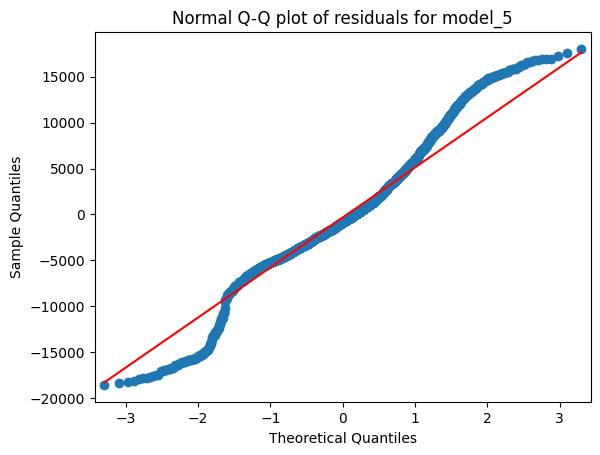

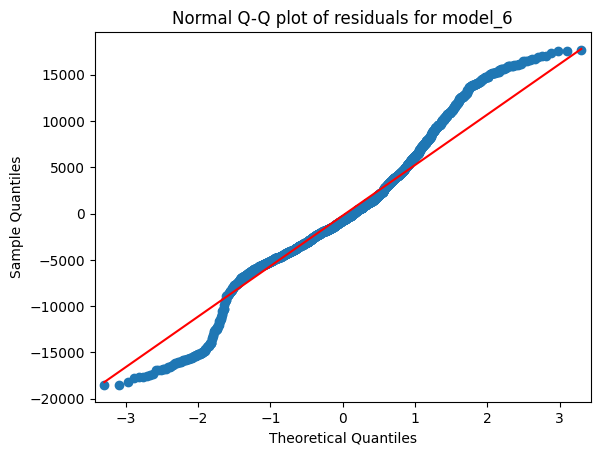

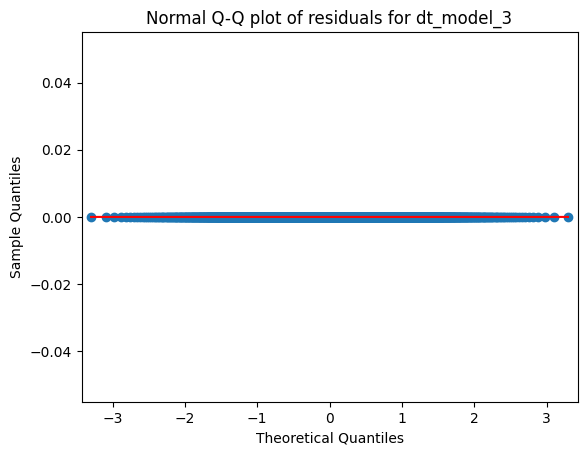

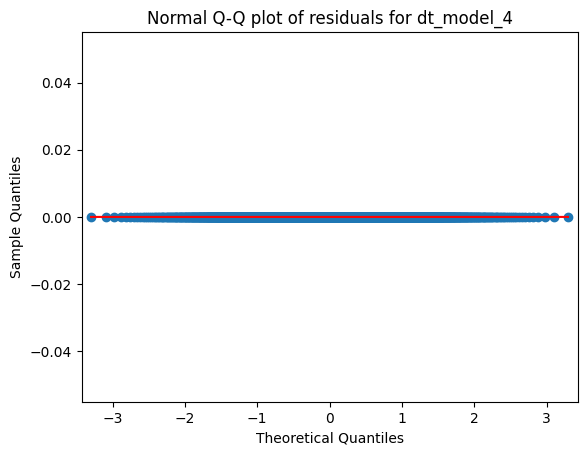

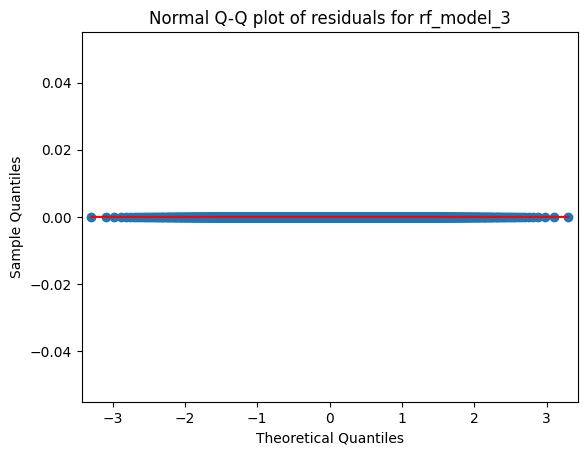

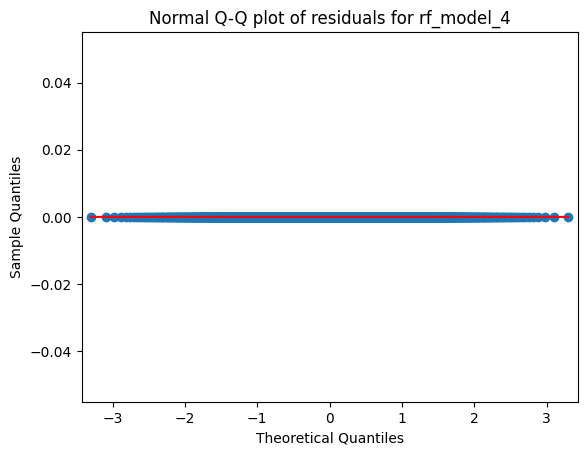

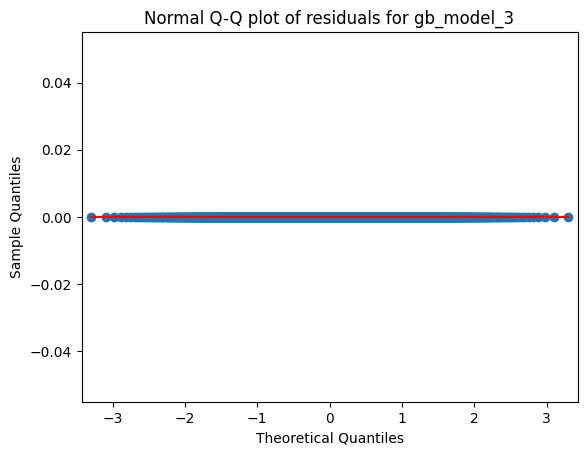

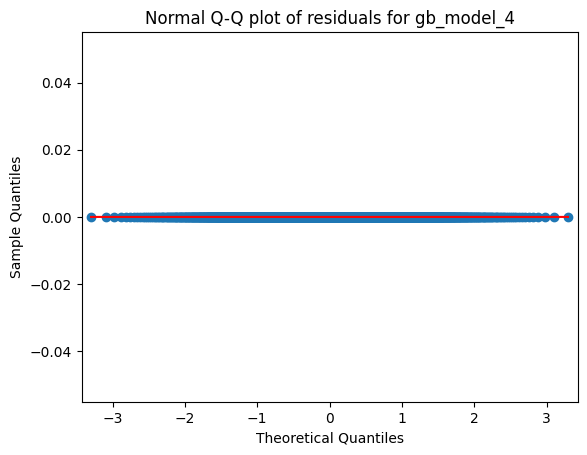

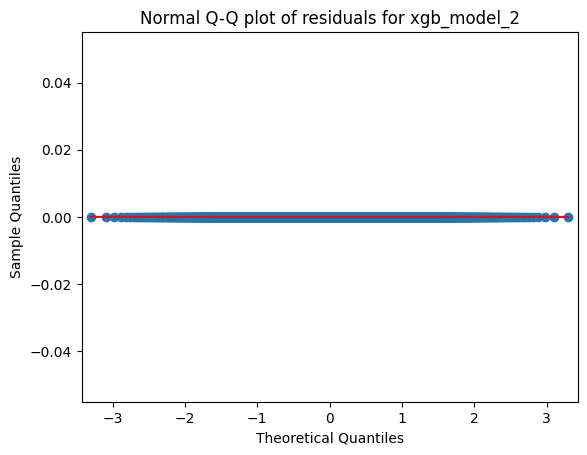

In [ ]:
import statsmodels.api as sm  # Importing statsmodels for statistical modeling
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import numpy as np  # For numerical operations

# Dictionary of models
models = {
    "model_5": model_5,
    "model_6": model_6,
    "dt_model_3": dt_model_3,
    "dt_model_4": dt_model_4,
    "rf_model_3": rf_model_3,
    "rf_model_4": rf_model_4,
    "gb_model_3": gb_model_3,
    "gb_model_4": gb_model_4,
    "xgb_model_2": xgb_model_2
}

# Ensure y_train and X_train are NumPy arrays
y_train_3 = np.asarray(replaced_y_train)  # True training labels
X_train = np.asarray(replaced_X_train)  # Training feature matrix

for model_name, model in models.items():
    try:
        # Predict target values and calculate residuals
        if hasattr(model, "resid"):  # For statsmodels models
            residuals = model.resid
        else:  # For sklearn models
            y_pred = model.predict(replaced_X_train)  # Replace `X_train` with the same dataset the model was trained on
            y_pred = np.asarray(y_train_3)  # Ensure predictions are NumPy arrays

            # Check for shape mismatches
            if y_train_3.shape[0] != y_pred.shape[0]:  # Compare the number of rows
                raise ValueError(
                    f"Shape mismatch: y_train has {y_train_3.shape[0]} samples, "
                    f"but predictions have {y_pred.shape[0]} samples for {model_name}"
                )
            residuals = y_train_3 - y_pred  # Compute residuals

        # Generate Q-Q plot
        qqplot = sm.qqplot(residuals, line='q')  # Q-Q plot with diagonal reference line
        plt.title(f"Normal Q-Q plot of residuals for {model_name}")  # Plot title
        plt.show()  # Display the plot

    except Exception as e:
        print(f"Error processing {model_name}: {e}")

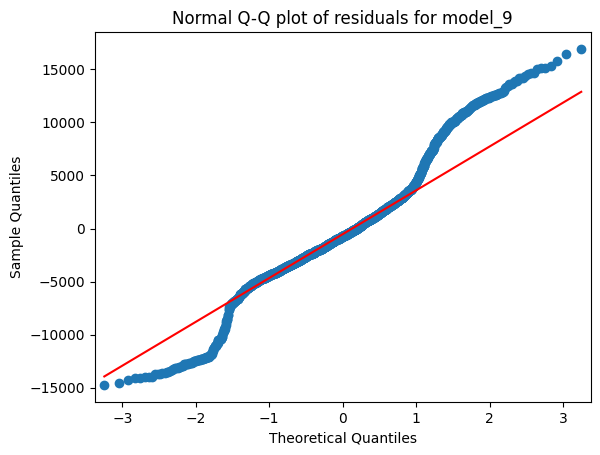

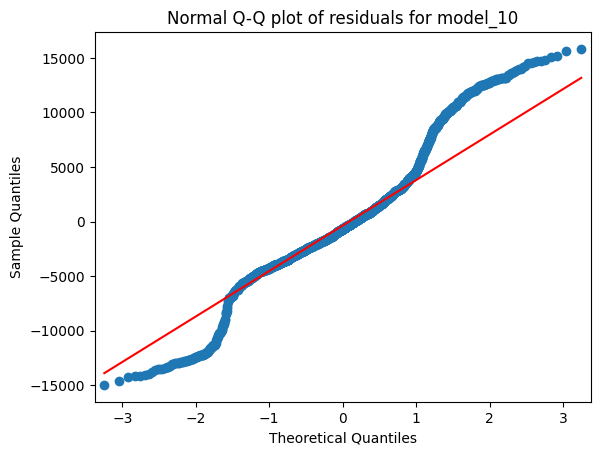

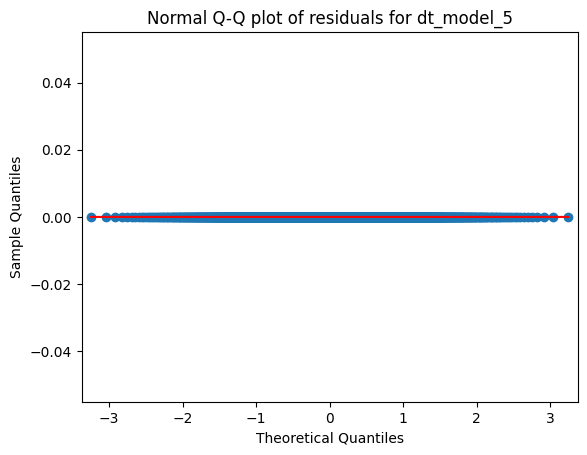

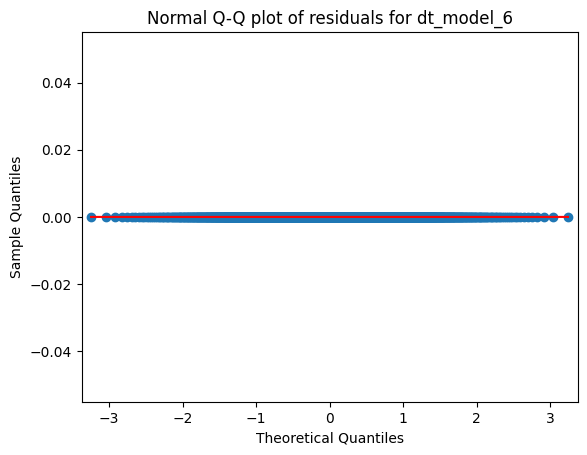

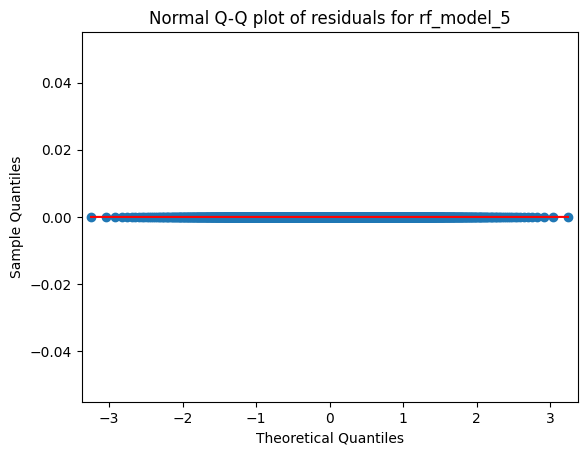

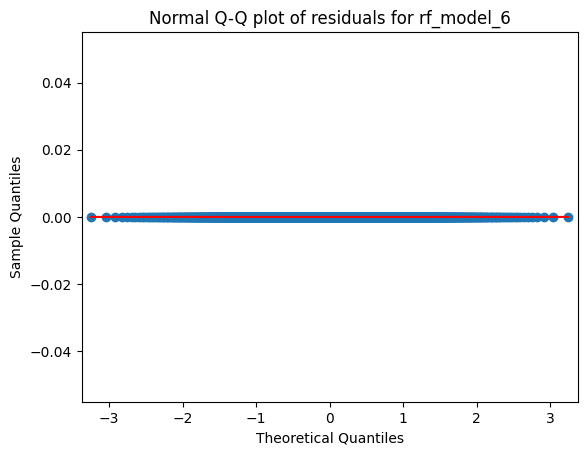

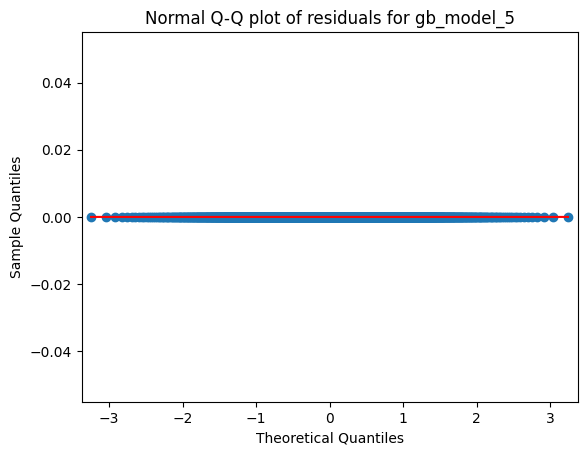

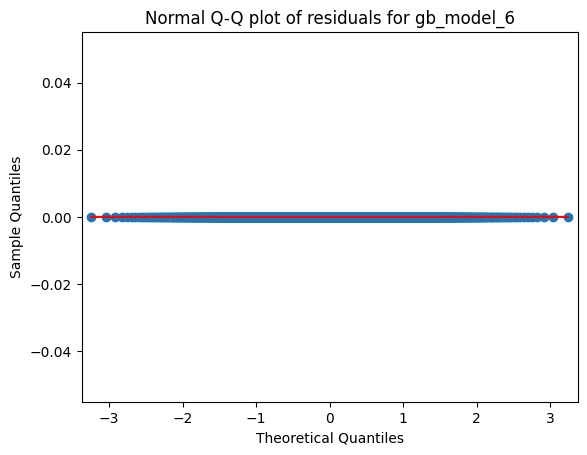

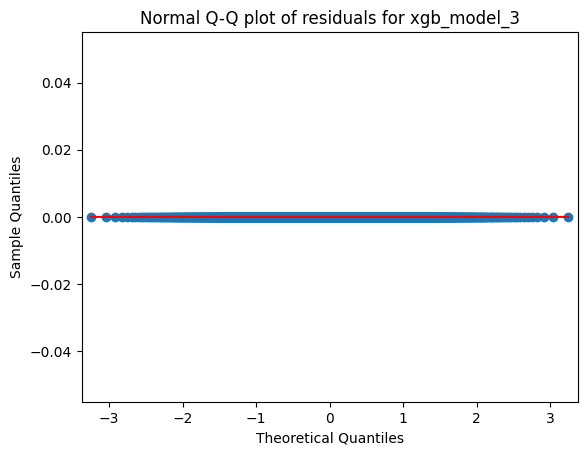

In [ ]:
import statsmodels.api as sm  # Importing statsmodels for statistical modeling
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import numpy as np  # For numerical operations

# Dictionary of models
models = {
    "model_9": model_9,
    "model_10": model_10,
    "dt_model_5": dt_model_5,
    "dt_model_6": dt_model_6,
    "rf_model_5": rf_model_5,
    "rf_model_6": rf_model_6,
    "gb_model_5": gb_model_5,
    "gb_model_6": gb_model_6,
    "xgb_model_3": xgb_model_3
}

# Ensure y_train and X_train are NumPy arrays
y_train_4 = np.asarray(cleaned_y_train)  # True training labels
X_train = np.asarray(cleaned_X_train)  # Training feature matrix

for model_name, model in models.items():
    try:
        # Predict target values and calculate residuals
        if hasattr(model, "resid"):  # For statsmodels models
            residuals = model.resid
        else:  # For sklearn models
            y_pred = model.predict(cleaned_X_train)  # Replace `X_train` with the same dataset the model was trained on
            y_pred = np.asarray(y_train_4)  # Ensure predictions are NumPy arrays

            # Check for shape mismatches
            if y_train_4.shape[0] != y_pred.shape[0]:  # Compare the number of rows
                raise ValueError(
                    f"Shape mismatch: y_train has {y_train_4.shape[0]} samples, "
                    f"but predictions have {y_pred.shape[0]} samples for {model_name}"
                )
            residuals = y_train_4 - y_pred  # Compute residuals

        # Generate Q-Q plot
        qqplot = sm.qqplot(residuals, line='q')  # Q-Q plot with diagonal reference line
        plt.title(f"Normal Q-Q plot of residuals for {model_name}")  # Plot title
        plt.show()  # Display the plot

    except Exception as e:
        print(f"Error processing {model_name}: {e}")

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
print(final_X_train.shape)
print(y_train.shape)

(2044, 12)
(2044, 1)


In [ ]:
# Initialize the Lasso model with desired parameters (e.g., alpha for regularization strength)
lasso_model = Lasso(alpha=1.0)  # You can adjust alpha as needed

# Fit the model to the training data
lasso_model.fit(final_X_train, y_train)

Lasso()

In [ ]:
# Predict on the training data
y_train_pred = lasso_model.predict(final_X_train)

# Predict on the test data
y_test_pred = lasso_model.predict(final_X_test)


In [ ]:
# Calculate metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training set:")
print(f"MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R-squared: {train_r2:.4f}")
print("Test set:")
print(f"MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R-squared: {test_r2:.4f}")

Training set:
MSE: 36721829.7805, RMSE: 6059.8539, R-squared: 0.6471
Test set:
MSE: 36393787.7292, RMSE: 6032.7264, R-squared: 0.6737


## LASSO



In [ ]:
# Initialize the Lasso model with desired parameters (e.g., alpha for regularization strength)
lasso_model = Lasso(alpha=1.0)  # You can adjust alpha as needed

# Fit the model to the training data
lasso_model.fit(replaced_X_train, replaced_y_train)

Lasso()

In [ ]:
# Predict on the training data
y_train_pred = lasso_model.predict(replaced_X_train)

# Predict on the test data
y_test_pred = lasso_model.predict(replaced_X_test)

In [ ]:
# Calculate metrics for training data
train_mse = mean_squared_error(replaced_y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(replaced_y_train, y_train_pred)

# Calculate metrics for test data
test_mse = mean_squared_error(replaced_y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(replaced_y_test, y_test_pred)

# Print the evaluation metrics
print("Training set:")
print(f"MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R-squared: {train_r2:.4f}")
print("Test set:")
print(f"MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R-squared: {test_r2:.4f}")

Training set:
MSE: 41363312.0812, RMSE: 6431.4316, R-squared: 0.4689
Test set:
MSE: 42520955.8001, RMSE: 6520.8094, R-squared: 0.4807


In [ ]:
# Initialize the Lasso model with desired parameters (e.g., alpha for regularization strength)
lasso_model = Lasso(alpha=1.0)  # You can adjust alpha as needed

# Fit the model to the training data
lasso_model.fit(cleaned_X_train, cleaned_y_train)

Lasso()

In [ ]:
# Predict on the training data
y_train_pred = lasso_model.predict(cleaned_X_train)

# Predict on the test data
y_test_pred = lasso_model.predict(cleaned_X_test)

In [ ]:
# Calculate metrics for training data
train_mse = mean_squared_error(cleaned_y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(cleaned_y_train, y_train_pred)

# Calculate metrics for test data
test_mse = mean_squared_error(cleaned_y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(cleaned_y_test, y_test_pred)

# Print the evaluation metrics
print("Training set:")
print(f"MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R-squared: {train_r2:.4f}")
print("Test set:")
print(f"MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R-squared: {test_r2:.4f}")

Training set:
MSE: 30297010.2590, RMSE: 5504.2720, R-squared: 0.4222
Test set:
MSE: 24825111.7439, RMSE: 4982.4805, R-squared: 0.3695


## Ridge

In [ ]:
# Import the Ridge class from scikit-learn for Ridge regression
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model with a regularization strength of alpha=1.0
ridge = Ridge(alpha=1.0)

# Fit the Ridge regression model on the scaled training data and target variable
ridge.fit(final_X_train, y_train)

# Predict the target values using the fitted Ridge regression model
ridge_predictions = ridge.predict(final_X_train)

# Print the coefficients of the Ridge regression model
print("Ridge coefficients:", ridge.coef_)

# Print the R^2 score to evaluate how well the model explains the variance in the target variable
print("Ridge R^2 score:", r2_score(y_train, ridge_predictions))

# Print the Mean Squared Error to assess the average squared difference between predicted and actual values
print("Ridge Mean Squared Error:", mean_squared_error(y_train, ridge_predictions))

Ridge coefficients: [[ 1257.34090503   385.22987211  -253.15184278 -2913.43938651
  -6510.28198711  -321.46932348   155.23303686   -17.1845551
     37.28152777 -2338.40508365   722.61762065   306.11676728]]
Ridge R^2 score: 0.6471076678448391
Ridge Mean Squared Error: 36721829.48666797


In [ ]:
# Import the Ridge class from scikit-learn for Ridge regression
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model with a regularization strength of alpha=1.0
ridge = Ridge(alpha=1.0)

# Fit the Ridge regression model on the scaled training data and target variable
ridge.fit(replaced_X_train, replaced_y_train)

# Predict the target values using the fitted Ridge regression model
ridge_predictions = ridge.predict(replaced_X_train)

# Print the coefficients of the Ridge regression model
print("Ridge coefficients:", ridge.coef_)

# Print the R^2 score to evaluate how well the model explains the variance in the target variable
print("Ridge R^2 score:", r2_score(replaced_y_train, ridge_predictions))

# Print the Mean Squared Error to assess the average squared difference between predicted and actual values
print("Ridge Mean Squared Error:", mean_squared_error(replaced_y_train, ridge_predictions))

Ridge coefficients: [ 5.97086244e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.08413982e+03  1.78710482e+02  6.76447222e+02 -3.61289510e+02
  3.18496442e-25 -2.11942928e+03  1.67453933e+02  4.27421055e+02]
Ridge R^2 score: 0.46894139140506774
Ridge Mean Squared Error: 41363301.172051564


In [ ]:
# Import the Ridge class from scikit-learn for Ridge regression
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model with a regularization strength of alpha=1.0
ridge = Ridge(alpha=1.0)

# Fit the Ridge regression model on the scaled training data and target variable
ridge.fit(cleaned_X_train, cleaned_y_train)

# Predict the target values using the fitted Ridge regression model
ridge_predictions = ridge.predict(cleaned_X_train)

# Print the coefficients of the Ridge regression model
print("Ridge coefficients:", ridge.coef_)

# Print the R^2 score to evaluate how well the model explains the variance in the target variable
print("Ridge R^2 score:", r2_score(cleaned_y_train, ridge_predictions))

# Print the Mean Squared Error to assess the average squared difference between predicted and actual values
print("Ridge Mean Squared Error:", mean_squared_error(cleaned_y_train, ridge_predictions))

Ridge coefficients: [ 2.73356761e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.13430157e+03 -6.00934811e+00  6.11078232e+01 -1.11576658e+03
  5.66733862e-26 -1.45844608e+03  7.72388611e+02  2.14191906e+02]
Ridge R^2 score: 0.422151025966123
Ridge Mean Squared Error: 30296982.271857575


## PCA

In [ ]:
from sklearn.decomposition import PCA

# Initialize the PCA object
# - This will create a PCA instance that can be used to perform dimensionality reduction
pca = PCA()

# Fit the PCA model to the scaled data and apply the dimensionality reduction
# - 'fit_transform()' computes the principal components and then projects the data onto these components
# - The result, 'pca_data', is the transformed dataset in the new principal component space
pca_data = pca.fit_transform(final_X_train)

In [ ]:
# Displaying the reduced dimensions
pca_data

array([[-3.2729364 , -1.06022909, -1.46016352, ..., -0.61068227,
        -0.43399905,  0.1194867 ],
       [ 1.30103898, -0.86606139,  1.25281998, ..., -0.07353564,
         0.08738865, -0.39705766],
       [ 1.64912075, -0.95666988, -0.85244233, ..., -0.11477804,
        -0.11955531, -0.36424678],
       ...,
       [-0.49423654,  0.9822706 , -0.22143808, ...,  0.54303287,
        -0.19957917, -0.00530391],
       [-0.89262487,  0.84136441,  1.06739703, ...,  0.73107529,
         0.08250578,  0.03454007],
       [ 0.18348522,  0.95204347,  0.14259542, ..., -0.47917771,
        -0.45592581,  0.04693709]])

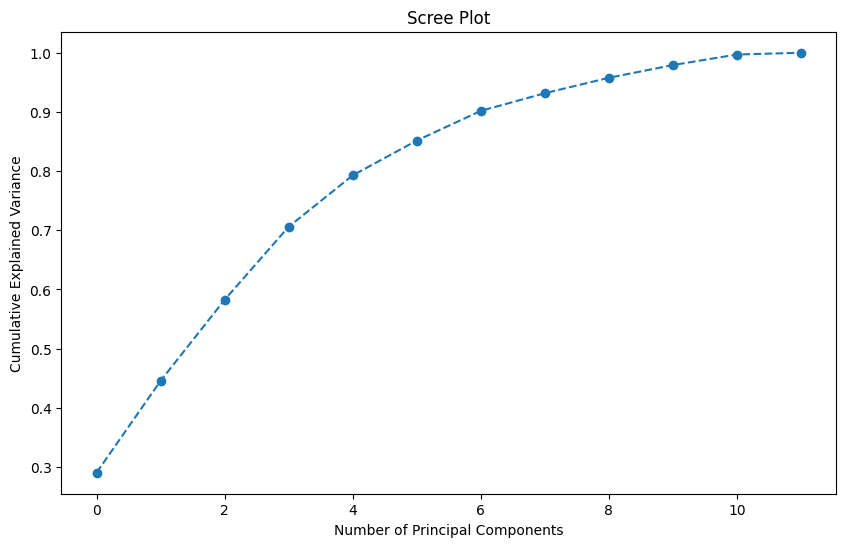

In [ ]:
# Determine the optimal number of principal components using scree plot or cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Choose 2 components for visualization

# Initialize the PCA object with the number of components set to 2
# - 'n_components=2' specifies that we want to reduce the data to 2 principal components for easier visualization
optimal_pca = PCA(n_components=5)

# Fit the PCA model to the scaled data and transform it to 2 components
# - 'fit_transform()' computes the principal components and reduces the data to 2 dimensions
# - The result, 'pca_transformed_data', is the dataset transformed into 2 principal components for visualization
pca_transformed_data = optimal_pca.fit_transform(final_X_train)

In [ ]:
# Disaplying the pca-transformed_data
pca_transformed_data

array([[-3.2729364 , -1.06022909, -1.46016352,  0.72032622, -1.51511205],
       [ 1.30103898, -0.86606139,  1.25281998, -0.94700279, -0.25641651],
       [ 1.64912075, -0.95666988, -0.85244233, -0.19198129,  0.18362362],
       ...,
       [-0.49423654,  0.9822706 , -0.22143808,  0.67415581,  1.12126375],
       [-0.89262487,  0.84136441,  1.06739703,  0.34215962, -1.40649596],
       [ 0.18348522,  0.95204347,  0.14259542, -1.24653842, -0.12593637]])

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'final_X_train' and 'final_X_test' are your preprocessed data

# 1. Scale the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(final_X_train)
X_test_scaled = scaler.transform(final_X_test)

# 2. Apply PCA
pca = PCA(n_components=0.95)  # Explain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3. Create DataFrames for PCA-transformed data
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(X_test_pca.shape[1])])

In [ ]:
X_train_pca_df.shape

(2044, 10)

In [ ]:
y_train.shape

(2044, 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100,             # Number of trees in the forest
    criterion='squared_error',    # Criterion for splitting
    min_samples_leaf=2,           # Minimum samples required in a leaf node
    min_samples_split=2,         # Minimum samples required to split an internal node
    random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100,        # Number of boosting stages
    max_depth=3,             # Maximum depth of the trees
    learning_rate=0.1,       # Shrinks the contribution of each tree
    objective='reg:squarederror',  # Loss function for regression
    random_state=42 )
}

In [ ]:
metrics = {
    "Model": [],
    "Dataset": [],
    "MSE": [],
    "RMSE": [],
    "MAE": [],
    "R²": []
}

for model_name, model in models.items():
    # Train the model with PCA-transformed data
    model.fit(X_train_pca_df, y_train)

    # Predict on both train and test datasets
    for dataset, (X, y) in zip(["Train", "Test"], [(X_train_pca_df, y_train), (X_test_pca_df, y_test)]):
        y_pred = model.predict(X)

        # Calculate metrics
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Store results
        metrics["Model"].append(model_name)
        metrics["Dataset"].append(dataset)
        metrics["MSE"].append(mse)
        metrics["RMSE"].append(rmse)
        metrics["MAE"].append(mae)
        metrics["R²"].append(r2)

# Display metrics
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


           Model Dataset           MSE         RMSE          MAE        R²
0  Random Forest   Train  3.623016e+06  1903.422181  1063.863312  0.965183
1  Random Forest    Test  1.702054e+07  4125.595347  2385.698233  0.847385
2        XGBoost   Train  1.112291e+07  3335.103284  2189.102302  0.893110
3        XGBoost    Test  1.716561e+07  4143.140393  2698.283124  0.846085


In [ ]:
"""from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_pca_df, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters", best_rf)"""

'from sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [10, 20, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\ngrid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring=\'r2\', n_jobs=-1)\ngrid_search.fit(X_train_pca_df, y_train)\nbest_rf = grid_search.best_estimator_\nprint("Best Parameters", best_rf)'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# ... (Your existing code for model evaluation) ...

models = {
    "Random Forest": RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200),
    "XGBoost": xgb.XGBRegressor(n_estimators=100,        # Number of boosting stages
    max_depth=3,             # Maximum depth of the trees
    learning_rate=0.1,       # Shrinks the contribution of each tree
    objective='reg:squarederror',  # Loss function for regression
    random_state=42 )
}

In [ ]:
metrics = {
    "Model": [],
    "Dataset": [],
    "MSE": [],
    "RMSE": [],
    "MAE": [],
    "R²": []
}

for model_name, model in models.items():
    # Train the model with PCA-transformed data
    model.fit(X_train_pca_df, y_train)

    # Predict on both train and test datasets
    for dataset, (X, y) in zip(["Train", "Test"], [(X_train_pca_df, y_train), (X_test_pca_df, y_test)]):
        y_pred = model.predict(X)

        # Calculate metrics
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Store results
        metrics["Model"].append(model_name)
        metrics["Dataset"].append(dataset)
        metrics["MSE"].append(mse)
        metrics["RMSE"].append(rmse)
        metrics["MAE"].append(mae)
        metrics["R²"].append(r2)

# Display metrics
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

           Model Dataset           MSE         RMSE          MAE        R²
0  Random Forest   Train  3.630886e+06  1905.488378  1064.401208  0.965108
1  Random Forest    Test  1.720627e+07  4148.043778  2399.836896  0.845720
2        XGBoost   Train  1.112291e+07  3335.103284  2189.102302  0.893110
3        XGBoost    Test  1.716561e+07  4143.140393  2698.283124  0.846085


In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.3 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor  # Import LightGBM
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define models
models = {
    "Random Forest": RandomForestRegressor(
        max_depth=20,
        min_samples_leaf=2,
        n_estimators=200
    ),
    "XGBoost": xgb.XGBRegressor(
        n_estimators=100,        # Number of boosting stages
        max_depth=3,             # Maximum depth of the trees
        learning_rate=0.1,       # Shrinks the contribution of each tree
        objective='reg:squarederror',  # Loss function for regression
        random_state=42
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=100,       # Number of boosting stages
        max_depth=-1,           # No limit on tree depth
        learning_rate=0.1,      # Shrinks the contribution of each tree
        random_state=42         # For reproducibility
    )
}

# Now use the `models` dictionary in your model evaluation code.


In [ ]:
metrics = {
    "Model": [],
    "Dataset": [],
    "MSE": [],
    "RMSE": [],
    "MAE": [],
    "R²": []
}

for model_name, model in models.items():
    # Train the model with PCA-transformed data
    model.fit(X_train_pca_df, y_train)

    # Predict on both train and test datasets
    for dataset, (X, y) in zip(["Train", "Test"], [(X_train_pca_df, y_train), (X_test_pca_df, y_test)]):
        y_pred = model.predict(X)

        # Calculate metrics
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Store results
        metrics["Model"].append(model_name)
        metrics["Dataset"].append(dataset)
        metrics["MSE"].append(mse)
        metrics["RMSE"].append(rmse)
        metrics["MAE"].append(mae)
        metrics["R²"].append(r2)

# Display metrics
import pandas as pd
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 2044, number of used features: 10
[LightGBM] [Info] Start training from score 6920.330235
           Model Dataset           MSE         RMSE          MAE        R²
0  Random Forest   Train  3.587226e+06  1893.997295  1055.165149  0.965527
1  Random Forest    Test  1.689885e+07  4110.820776  2361.726739  0.848477
2        XGBoost   Train  1.112291e+07  3335.103284  2189.102302  0.893110
3        XGBoost    Test  1.716561e+07  4143.140393  2698.283124  0.846085
4       LightGBM   Train  2.285023e+06  1511.629238   911.412097  0.978041
5       LightGBM    Test  1.529818e+07  3911.289189  2256.902977  0.862829
